In [103]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv('data/lending_club_loan_two.csv')

### Exploritory Data Analysis

In [3]:
df.shape

(396030, 27)

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

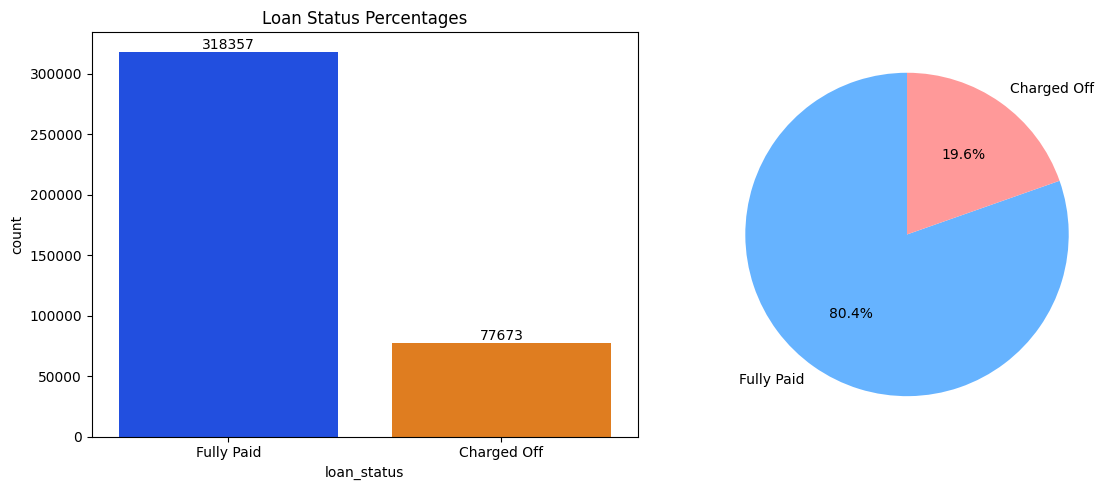

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df, x='loan_status', hue='loan_status', palette='bright', ax=ax[0])
ax[0].set_title('Loan Status Counts')
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', label_type='edge')

loan_status_counts = df['loan_status'].value_counts()
ax[1].pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
ax[0].set_title('Loan Status Percentages')

plt.tight_layout()
plt.show()


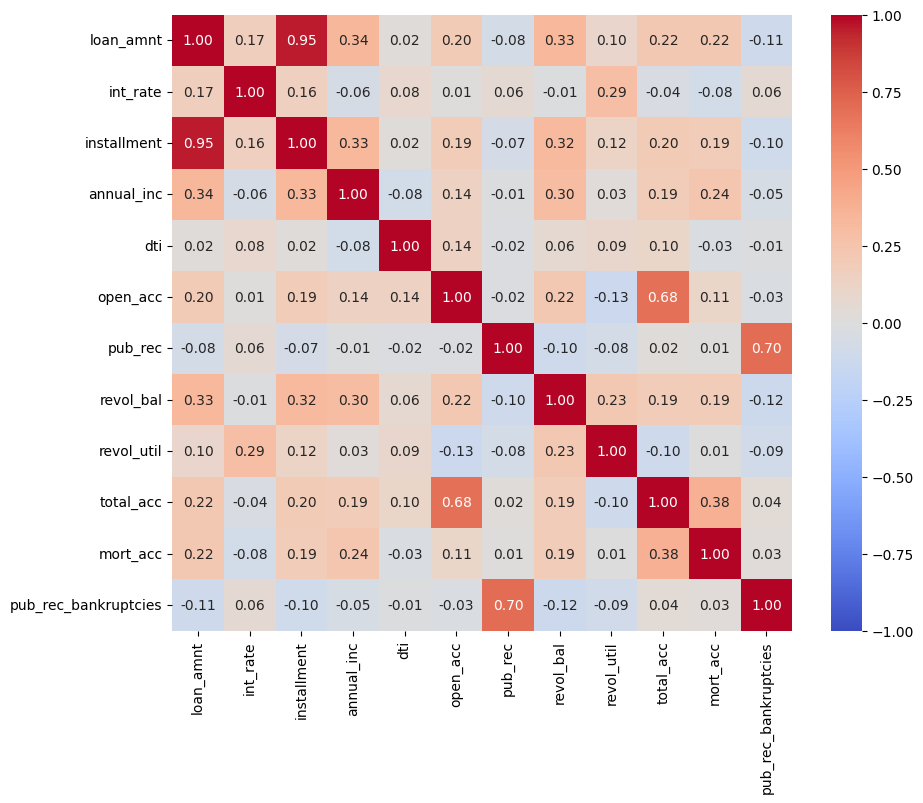

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm')
plt.show()

| Pair of variables                 | Correlation (r) | What it means                                                                               |
| --------------------------------- | --------------- | ------------------------------------------------------------------------------------------- |
| **loan\_amnt ↔ installment**      | **+0.95**       | Almost perfect positive correlation.  Larger loans → larger monthly payments.               |
| loan\_amnt ↔ annual\_inc          | +0.34           | Moderate positive.  Higher‑income applicants tend to take out larger loans.                 |
| installment ↔ annual\_inc         | +0.33           | Same story: higher income → bigger installment amounts.                                     |
| revol\_bal ↔ installment          | +0.32           | Borrowers with high outstanding balances also tend to have larger loans/payments.           |
| revol\_bal ↔ annual\_inc          | +0.30           | Modest: wealthier people often carry higher revolving balances.                             |
| int\_rate ↔ revol\_util           | +0.29           | Moderate: higher credit‑utilization → somewhat higher interest rates.                       |
| total\_acc ↔ open\_acc            | +0.68           | Strong: people with more total accounts naturally have more open accounts.                  |
| total\_acc ↔ mort\_acc            | +0.38           | Moderate: more mortgage accounts tend to go along with a higher total account count.        |
| pub\_rec\_bankruptcies ↔ pub\_rec | +0.70           | Strong: more public records (e.g. bankruptcies) associated with more public‐record entries. |


All other pairwise correlations fall below about |0.3|, meaning those relationships are fairly weak or negligible:

- Almost zero correlations (|r|<0.1) include things like dti vs. most variables, or int_rate vs. loan_amnt (r≈0.17).

- Slight negative correlations appear too—e.g. pub_rec_bankruptcies vs. loan_amnt (r≈−0.11): borrowers with bankruptcy records tend to take out slightly smaller loans.

##### Key takeaways
1. Loan size & payments
The two largest correlations in your matrix are trivial (a variable with itself) and the one between loan_amnt and installment (r≈0.95)—but that’s expected since installments are derived from the loan amount.

2. Income effects
Annual income shows a modest positive relationship (r≈0.3) with both loan size and revolving balance. In short, higher‐earning borrowers tend to both borrow and revolve more.

3. Credit‐usage & rates
There’s a noticeable correlation (r≈0.29) between revol_util (utilization rate) and int_rate, suggesting lenders charge higher rates to those using a larger share of their available credit.

4. Account counts
As you’d expect, the number of open accounts, total accounts, and mortgage accounts all hang together (r≈0.4–0.7).

5. Weak/insignificant links
Many of the other pairings are under |0.2|, indicating very weak linear relationships. For example, debt‑to‑income ratio (dti) doesn’t line up strongly with any of your other numeric predictors.

`Bottom line`: aside from the mechanical link between loan amount and installment, correlations in your dataset are generally modest, with most |r| < 0.5. That suggests you won’t run into extreme multicollinearity (outside of the loan/installment pair), but you may still want to watch out for the “account count” cluster (open_acc/total_acc/mort_acc) and for revolving‐utilization vs. interest rate when building predictive models.

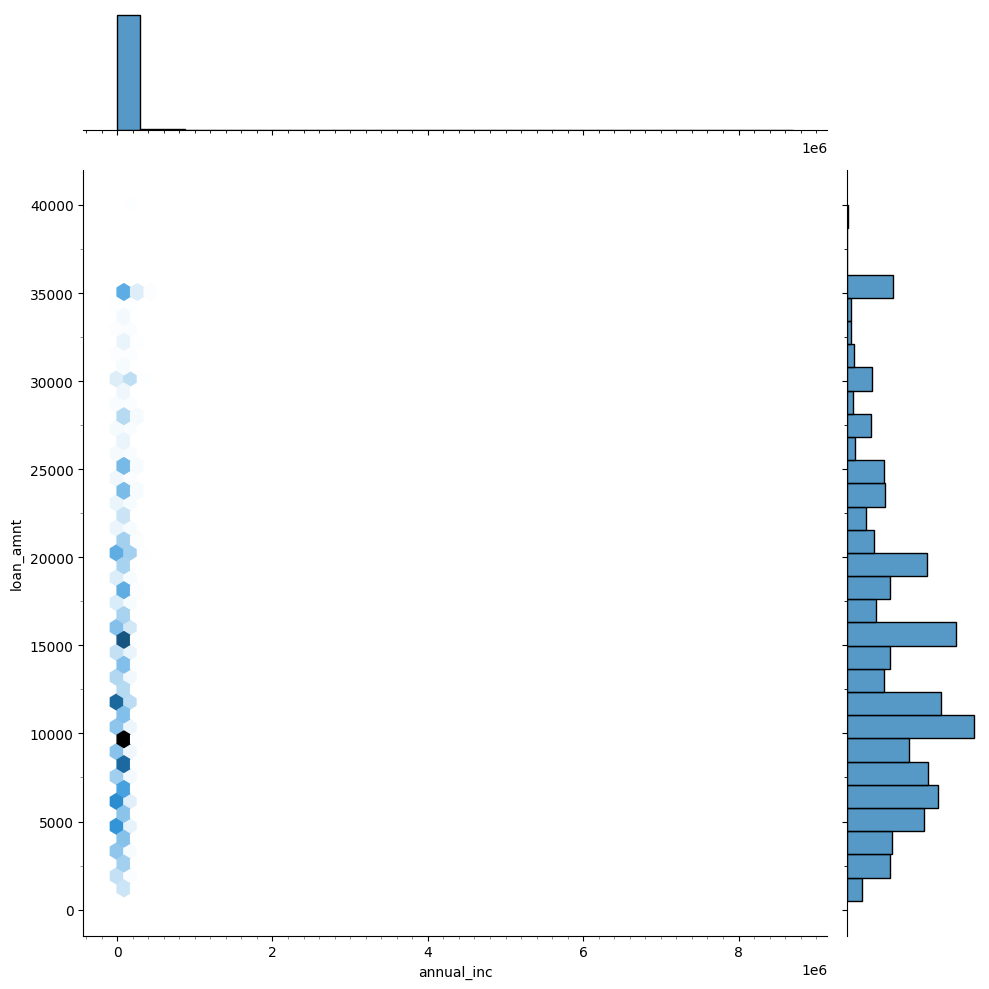

In [10]:
g = sns.jointplot(
    x='annual_inc',
    y='loan_amnt',
    data=df,
    kind='hex',
    marginal_kws=dict(bins=30, fill=True),
    height=10,
    ratio= 5
)

g.ax_joint.xaxis.set_minor_locator(MultipleLocator(200000))
g.ax_joint.yaxis.set_minor_locator(MultipleLocator(2500))
g.ax_joint.tick_params(which='minor', length=2, color='gray')




plt.tight_layout()
plt.show()

In [11]:
df['annual_inc'].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

In [12]:
df.loc[df['annual_inc'] >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

Text(0, 0.5, 'Installment')

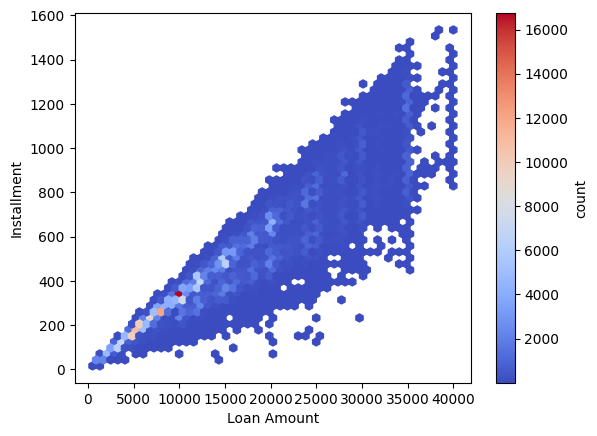

In [13]:

plt.hexbin(df.loan_amnt, df.installment, gridsize=50, mincnt=1, cmap='coolwarm')
plt.colorbar(label='count')
plt.xlabel('Loan Amount'); plt.ylabel('Installment')


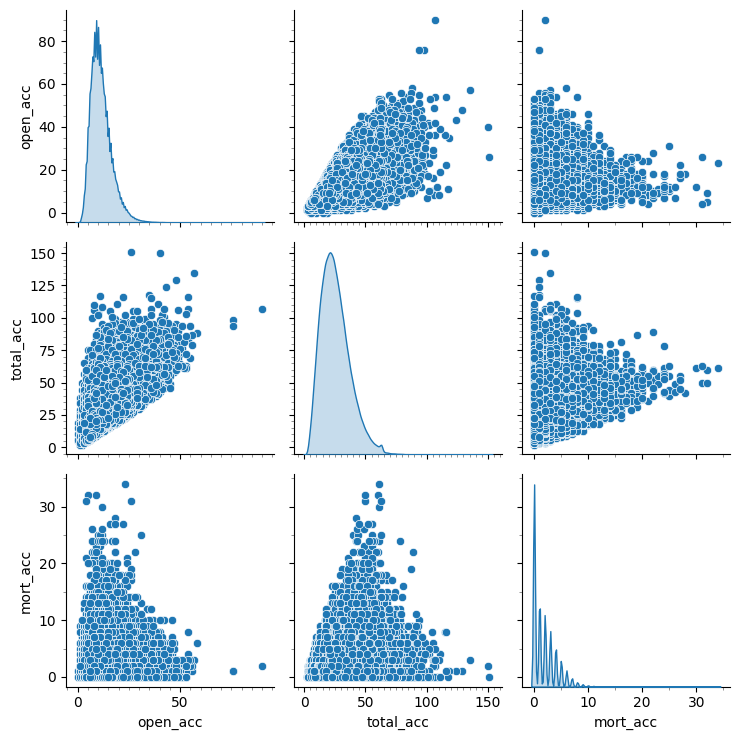

In [14]:

g = sns.pairplot(
    df[['open_acc','total_acc','mort_acc']],
    kind='scatter',
    diag_kind='kde'
)

for ax in g.axes.flat:
    ax.xaxis.set_minor_locator(MultipleLocator(5))

    ax.yaxis.set_minor_locator(MultipleLocator(5))

    ax.tick_params(which='minor', length=2, color='gray')


plt.tight_layout()
plt.show()

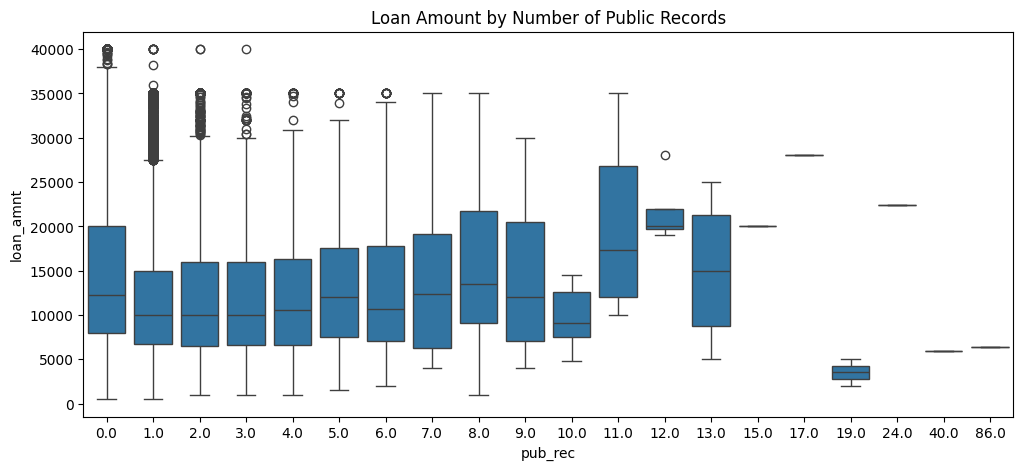

In [15]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='pub_rec', y='loan_amnt', data=df)
plt.title('Loan Amount by Number of Public Records')

plt.show()

   pub_rec   int_rate
0      0.0  13.512308
1      1.0  14.320031
2      2.0  14.790765
3      3.0  14.741801
4      4.0  14.984307


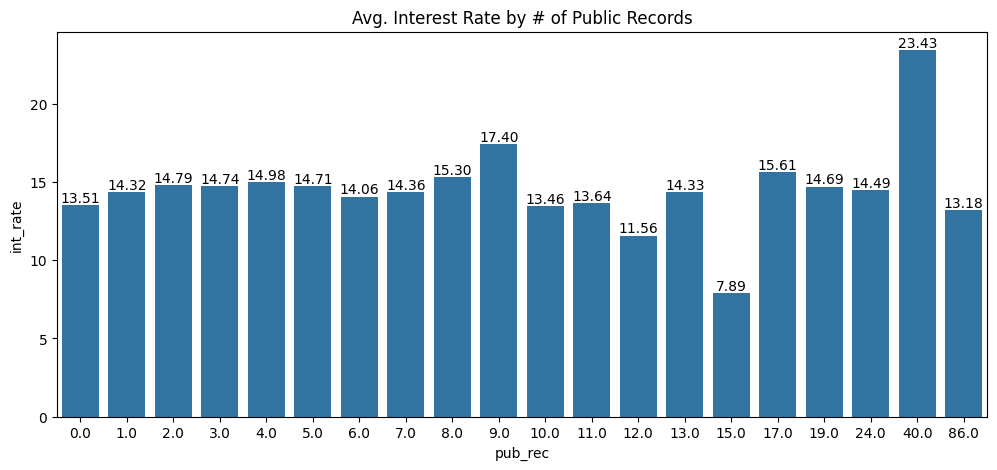

In [16]:
plt.figure(figsize=(12,5))
avg_int_rate_by_pub_rec = df.groupby('pub_rec')['int_rate'].mean().reset_index()
print(avg_int_rate_by_pub_rec.head())
ax = sns.barplot(data=avg_int_rate_by_pub_rec, x='pub_rec', y='int_rate')
plt.title('Avg. Interest Rate by # of Public Records')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.show()

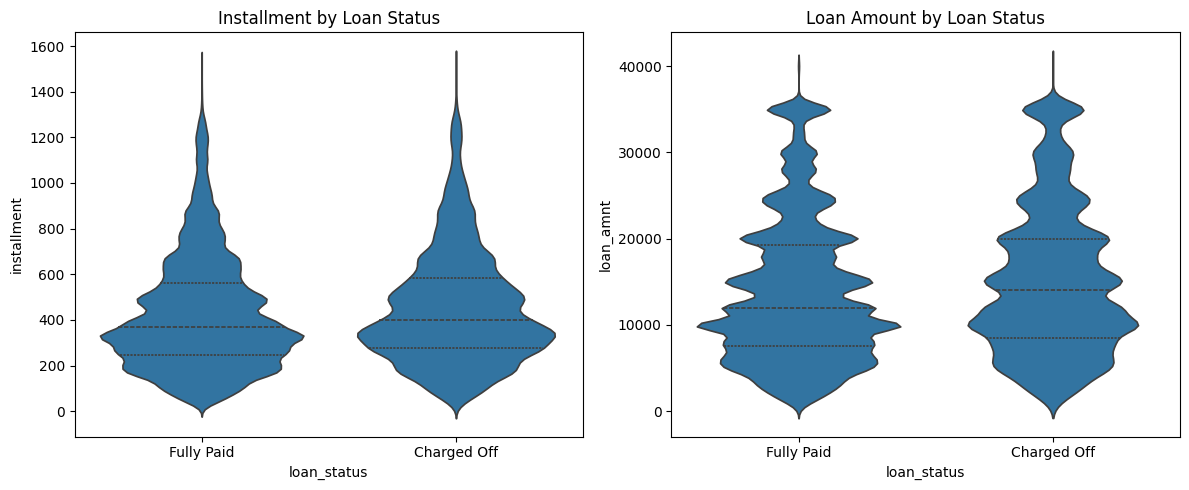

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(x='loan_status', y='installment', data=df, inner='quartile', ax=axes[0])
axes[0].set_title('Installment by Loan Status')

sns.violinplot(x='loan_status', y='loan_amnt', data=df, inner='quartile', ax=axes[1])
axes[1].set_title('Loan Amount by Loan Status')

plt.tight_layout()
plt.show()


In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
print(f"Grade Unique: {df['grade'].unique()}")
print(f"Sub Grade Unique: {df['sub_grade'].unique()}")

Grade Unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Sub Grade Unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


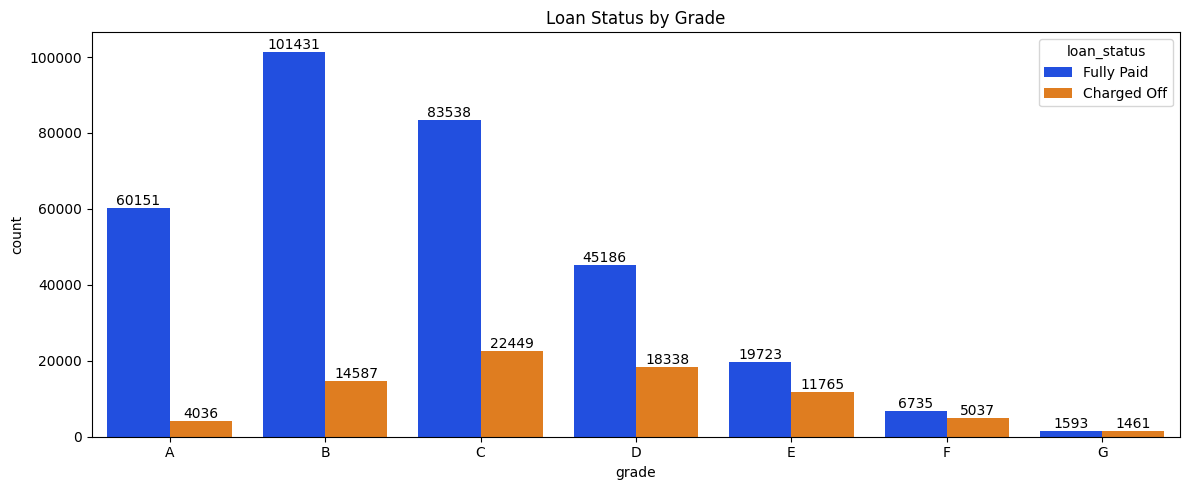

In [20]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x='grade', hue ='loan_status', palette='bright', order=grade_order)

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type='edge')

plt.title("Loan Status by Grade")
plt.tight_layout()
plt.show()

In [21]:
df.groupby('grade')['loan_status'].value_counts(normalize=True).round(2)

grade  loan_status
A      Fully Paid     0.94
       Charged Off    0.06
B      Fully Paid     0.87
       Charged Off    0.13
C      Fully Paid     0.79
       Charged Off    0.21
D      Fully Paid     0.71
       Charged Off    0.29
E      Fully Paid     0.63
       Charged Off    0.37
F      Fully Paid     0.57
       Charged Off    0.43
G      Fully Paid     0.52
       Charged Off    0.48
Name: proportion, dtype: float64

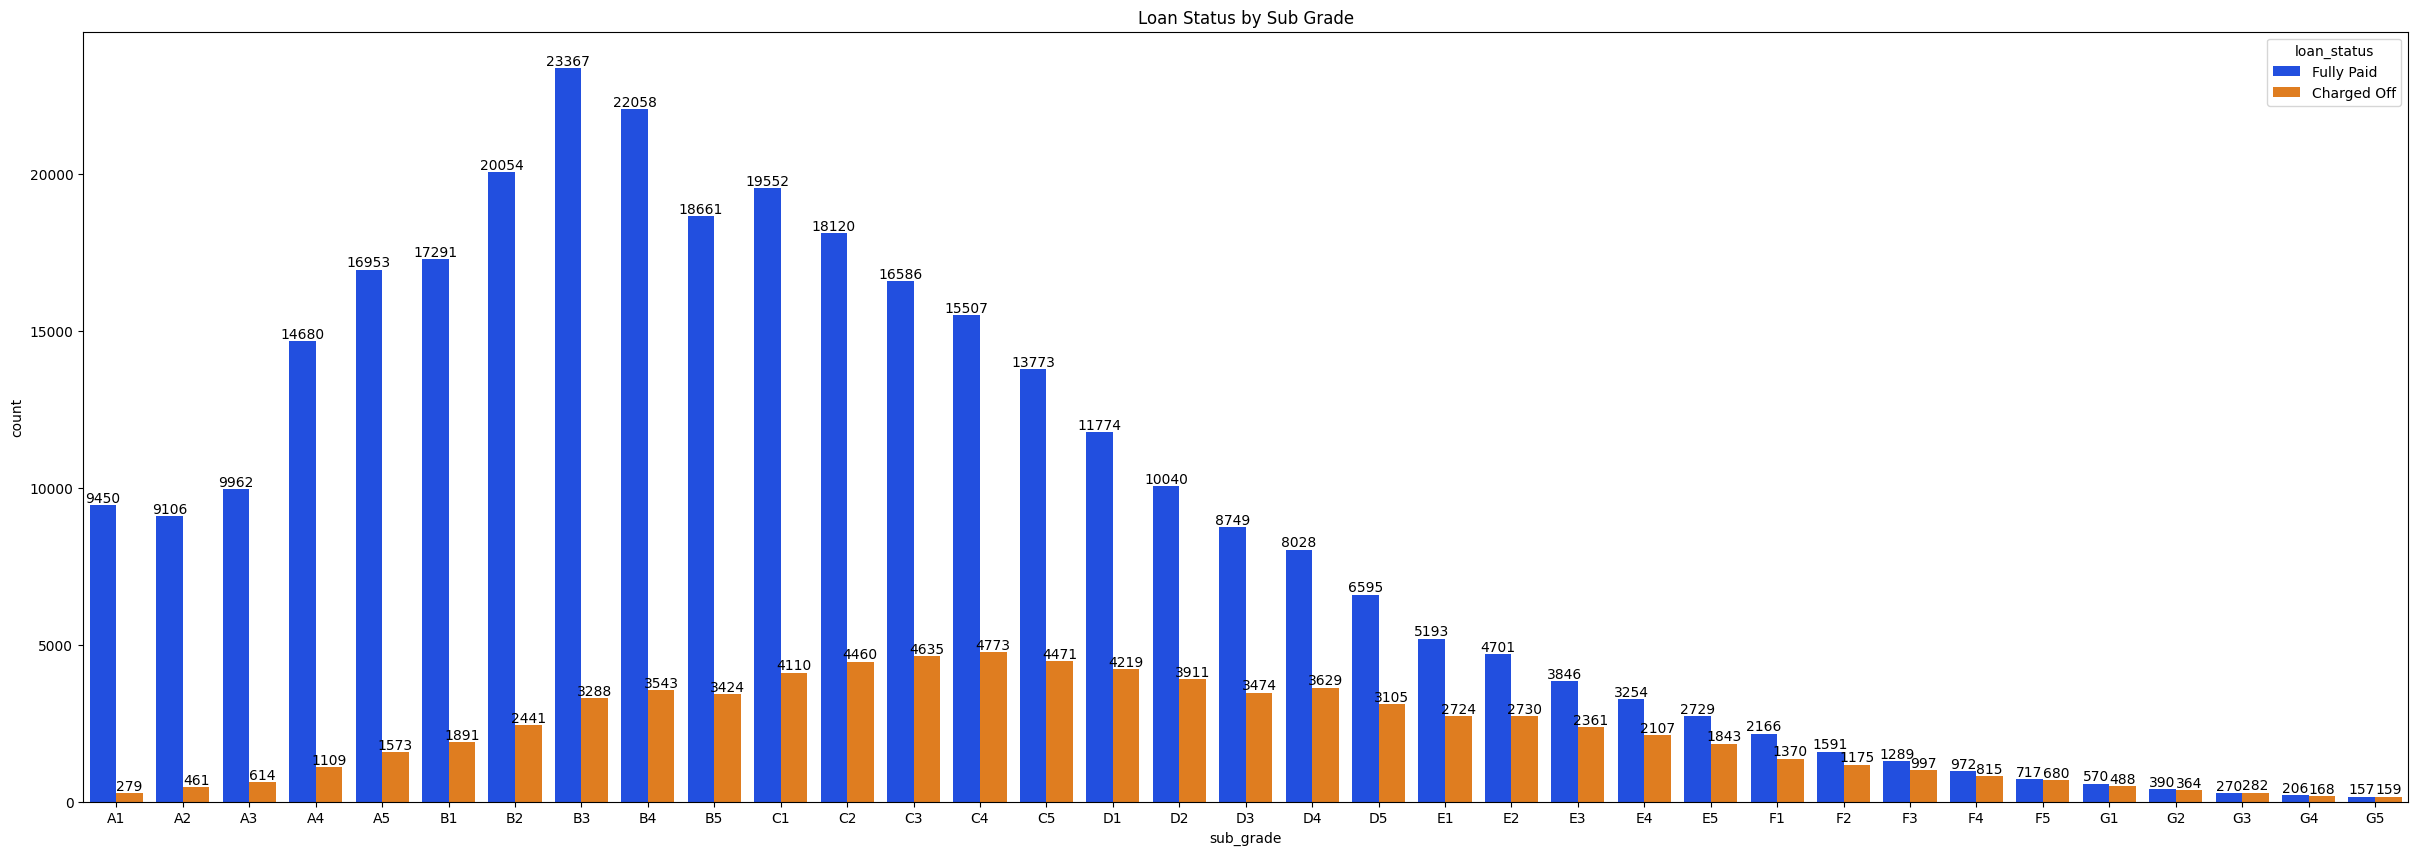

In [22]:
sub_grade_order = ['A1', 'A2', 'A3', 'A4', 'A5', 
                    'B1', 'B2', 'B3', 'B4', 'B5', 
                    'C1', 'C2', 'C3', 'C4', 'C5', 
                    'D1', 'D2', 'D3', 'D4', 'D5', 
                    'E1', 'E2', 'E3', 'E4', 'E5', 
                    'F1', 'F2', 'F3', 'F4', 'F5', 
                    'G1', 'G2', 'G3', 'G4', 'G5']
plt.figure(figsize=(30, 10))
ax =sns.countplot(data=df, x='sub_grade', hue = 'loan_status', palette='bright', order=sub_grade_order)

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type='edge')

plt.title("Loan Status by Sub Grade")
# plt.tight_layout()
plt.show()


In [23]:
df.groupby('sub_grade')['loan_status'].value_counts(normalize=True).round(2)

sub_grade  loan_status
A1         Fully Paid     0.97
           Charged Off    0.03
A2         Fully Paid     0.95
           Charged Off    0.05
A3         Fully Paid     0.94
                          ... 
G3         Fully Paid     0.49
G4         Fully Paid     0.55
           Charged Off    0.45
G5         Charged Off    0.50
           Fully Paid     0.50
Name: proportion, Length: 70, dtype: float64

In [24]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

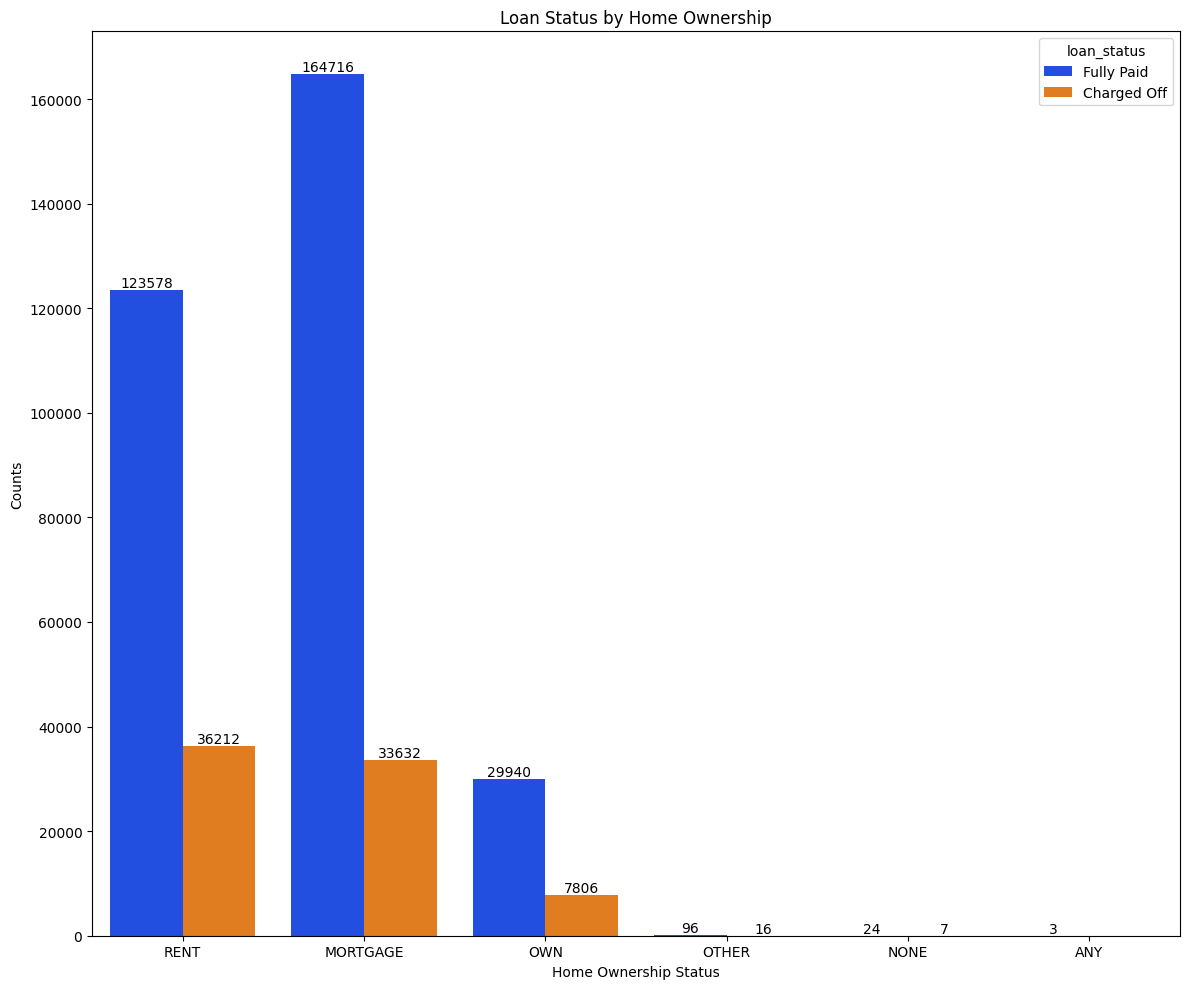

In [25]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(data=df, x=df['home_ownership'], hue=df['loan_status'], palette='bright', ax=ax)
ax.set_title("Loan Status by Home Ownership")
ax.set_xlabel("Home Ownership Status")
ax.set_ylabel("Counts")

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

The values for (NONE & ANY) are negligible so I'll combine them into the OTHER option

In [26]:
df.loc[(df['home_ownership'] == 'ANY') | (df['home_ownership'] == 'NONE'), 'home_ownership'] = 'OTHER'
df.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

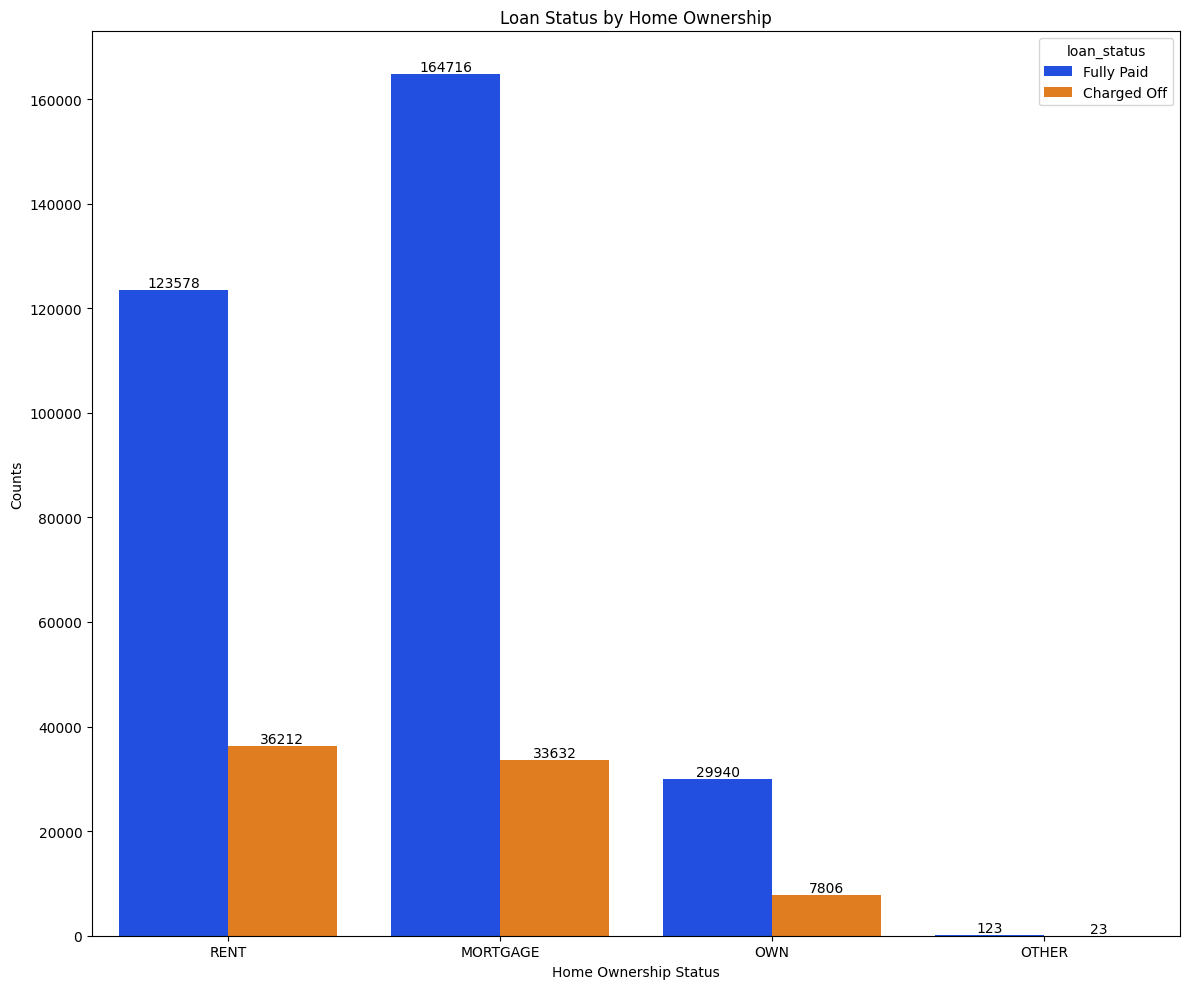

In [27]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(data=df, x=df['home_ownership'], hue=df['loan_status'], palette='bright', ax=ax)
ax.set_title("Loan Status by Home Ownership")
ax.set_xlabel("Home Ownership Status")
ax.set_ylabel("Counts")

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

In [28]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

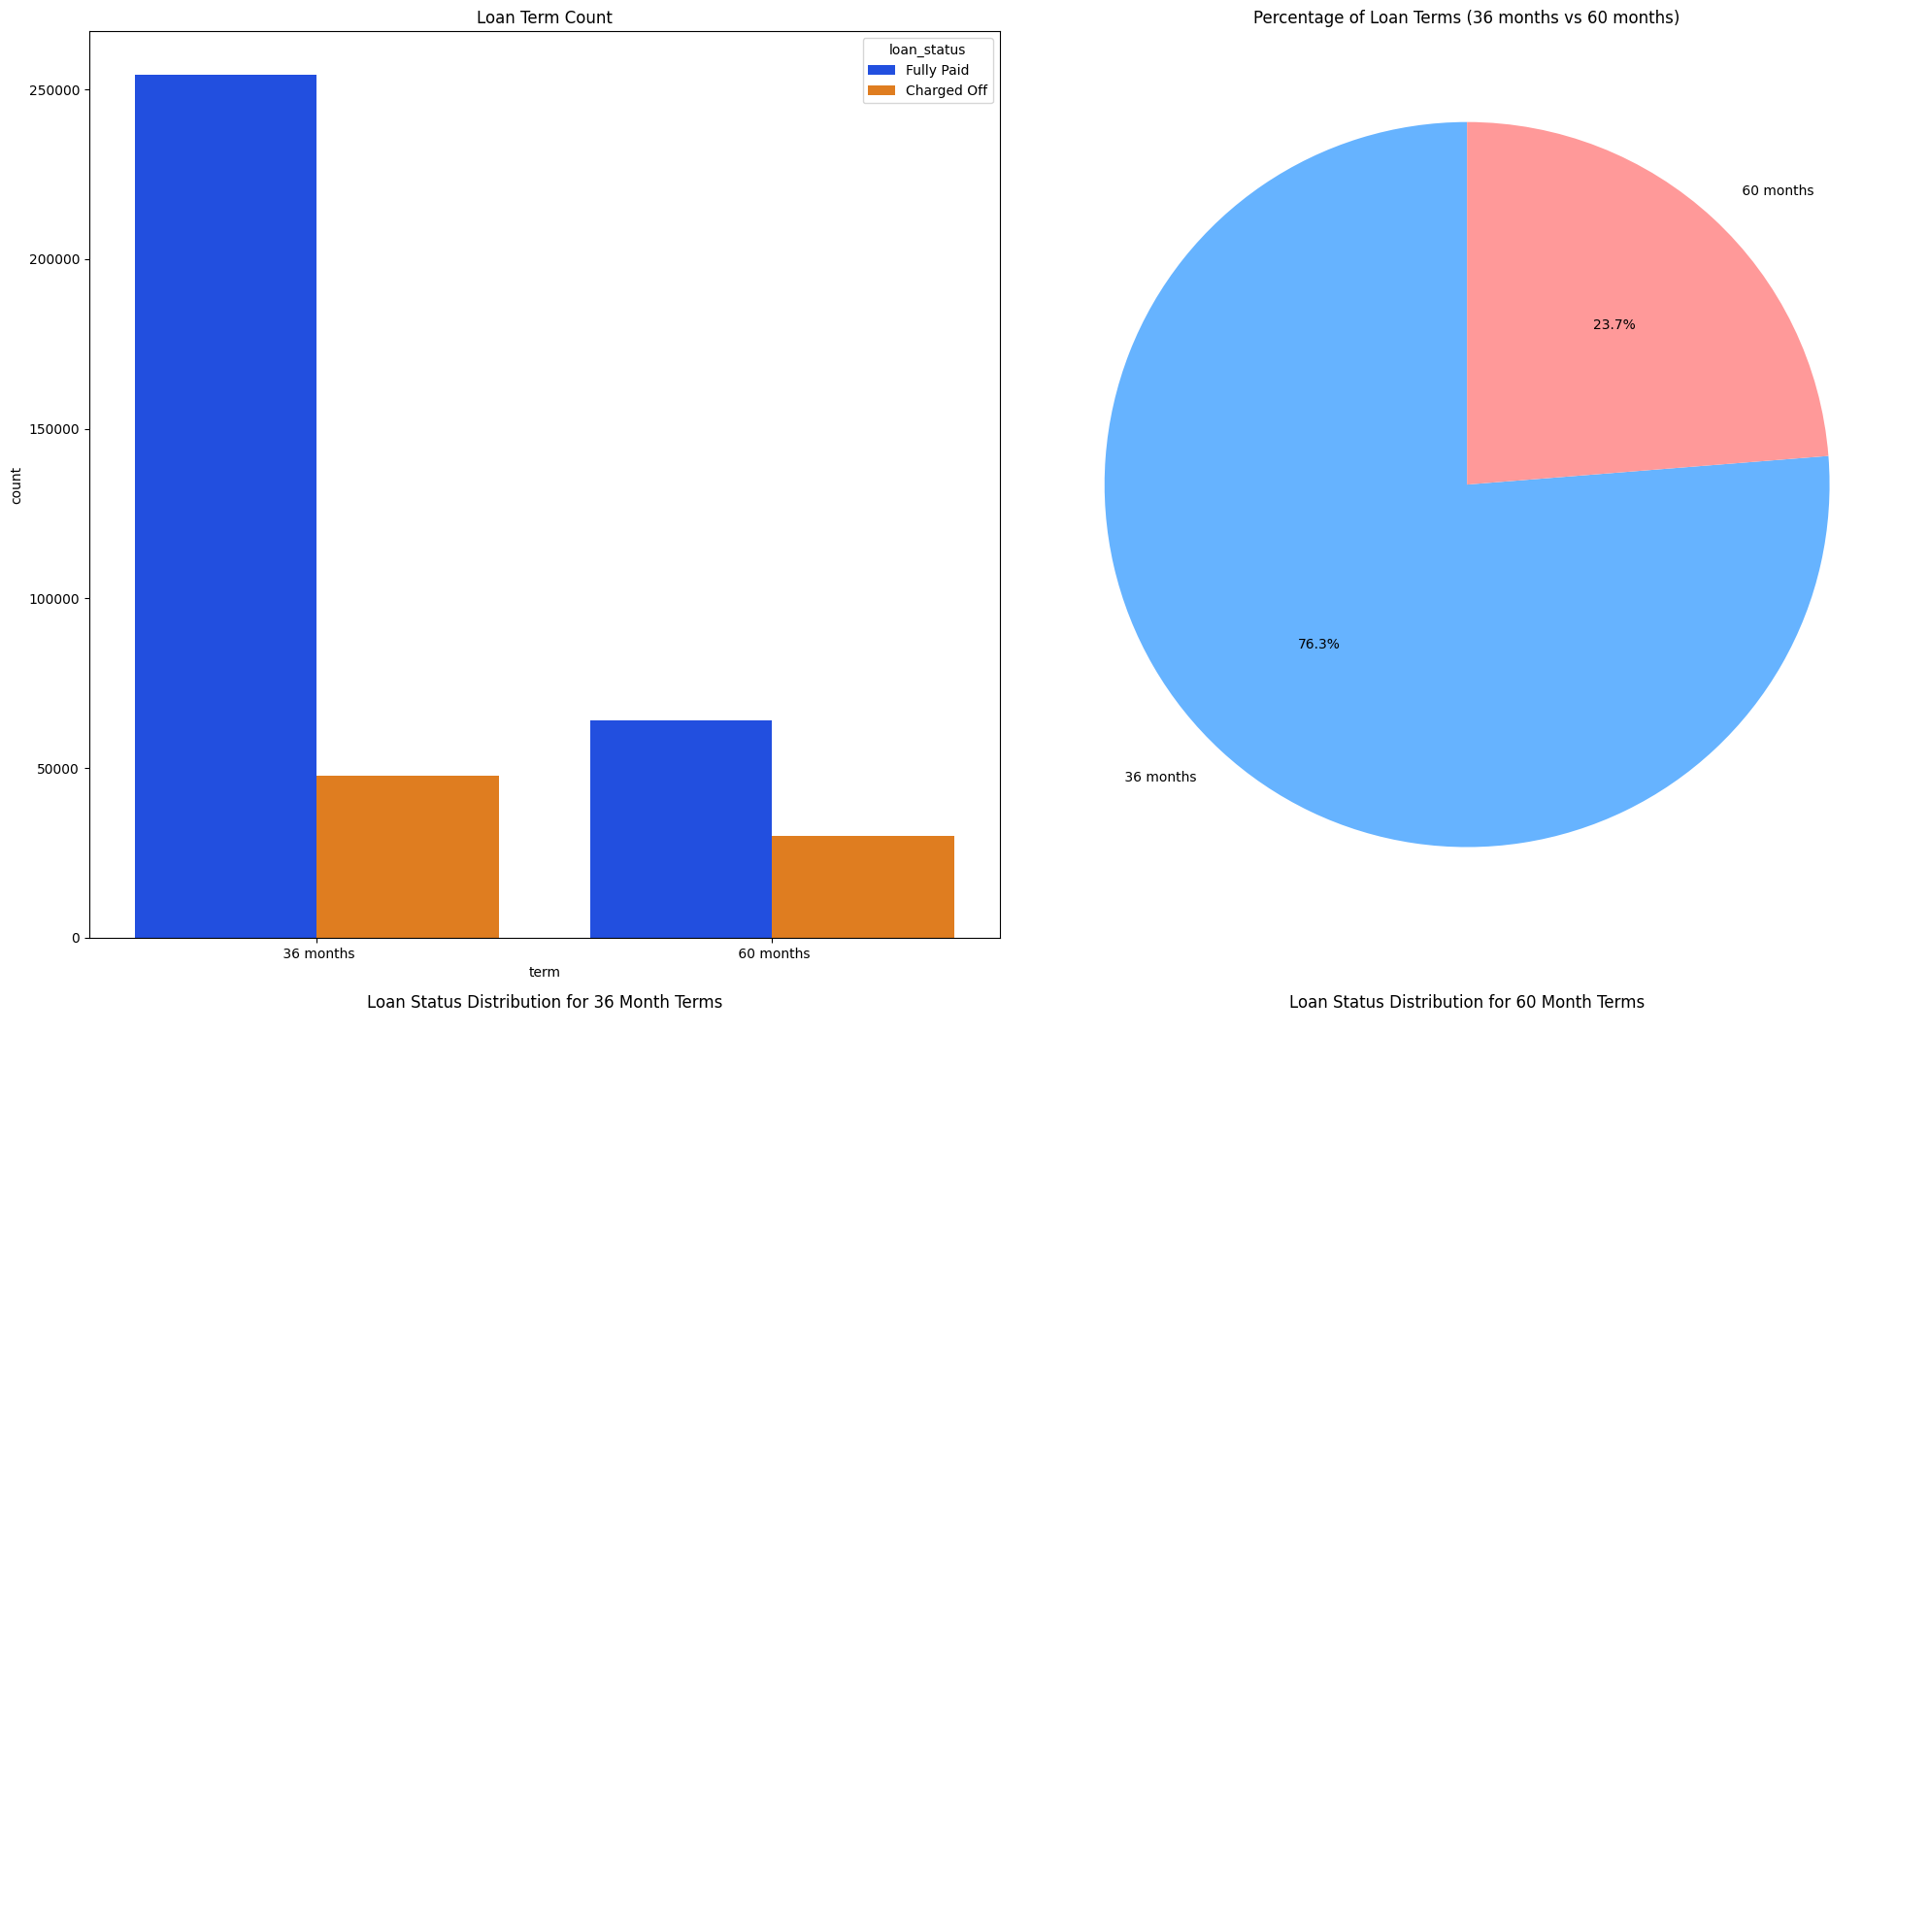

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))

sns.countplot(data=df, x=df['term'], ax=ax[0, 0], hue=df['loan_status'], palette='bright')
ax[0,0].set_title("Loan Term Count")

term_counts = df['term'].value_counts()
ax[0, 1].pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
ax[0, 1].set_title('Percentage of Loan Terms (36 months vs 60 months)')

loan_status_36_months = df.loc[df['term'] =='36 months', 'loan_status'].value_counts()

ax[1, 0].pie(loan_status_36_months, labels=loan_status_36_months.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
ax[1, 0].set_title('Loan Status Distribution for 36 Month Terms')

loan_status_60_months = df.loc[df['term'] =='60 months', 'loan_status'].value_counts()
ax[1, 1].pie(loan_status_60_months, labels=loan_status_60_months.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
ax[1, 1].set_title('Loan Status Distribution for 60 Month Terms')


plt.tight_layout()
plt.show()


In [30]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

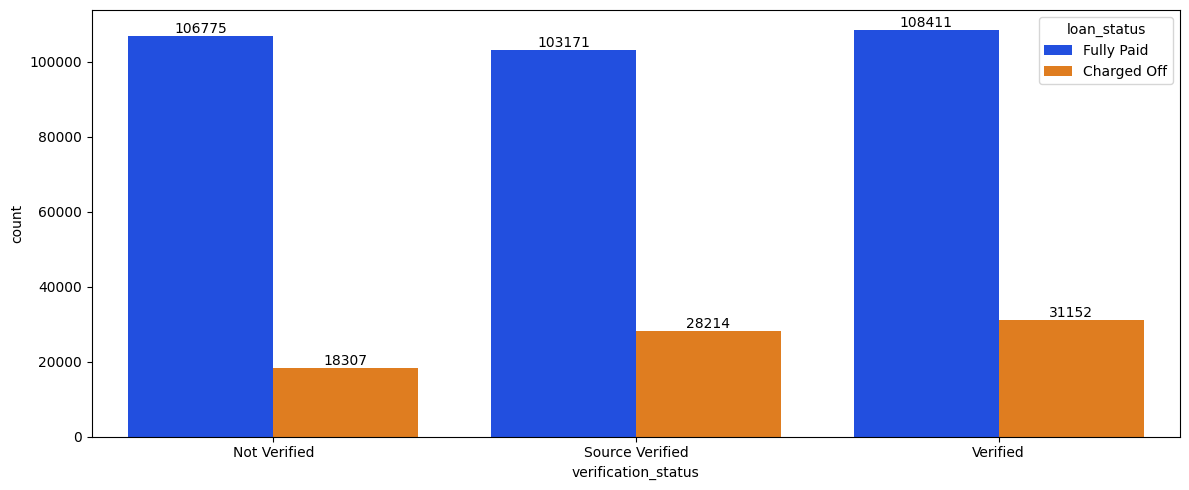

In [31]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(data=df, x=df['verification_status'], hue='loan_status', palette='bright')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.tight_layout()
plt.show()

In [32]:
print(df['verification_status'].value_counts())
print('-------------------------------------------')
print(df.groupby('verification_status')['loan_status'].value_counts(normalize=True))

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64
-------------------------------------------
verification_status  loan_status
Not Verified         Fully Paid     0.853640
                     Charged Off    0.146360
Source Verified      Fully Paid     0.785257
                     Charged Off    0.214743
Verified             Fully Paid     0.776789
                     Charged Off    0.223211
Name: proportion, dtype: float64


In [33]:
print(df['purpose'].unique())
print(f"Number of unique values: {df['purpose'].nunique()}")

['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
Number of unique values: 14


In [34]:
print(df['title'].unique())
print(f"Number of unique values: {df['title'].nunique()}")

['Vacation' 'Debt consolidation' 'Credit card refinancing' ...
 'Credit buster ' 'Loanforpayoff' 'Toxic Debt Payoff']
Number of unique values: 48816


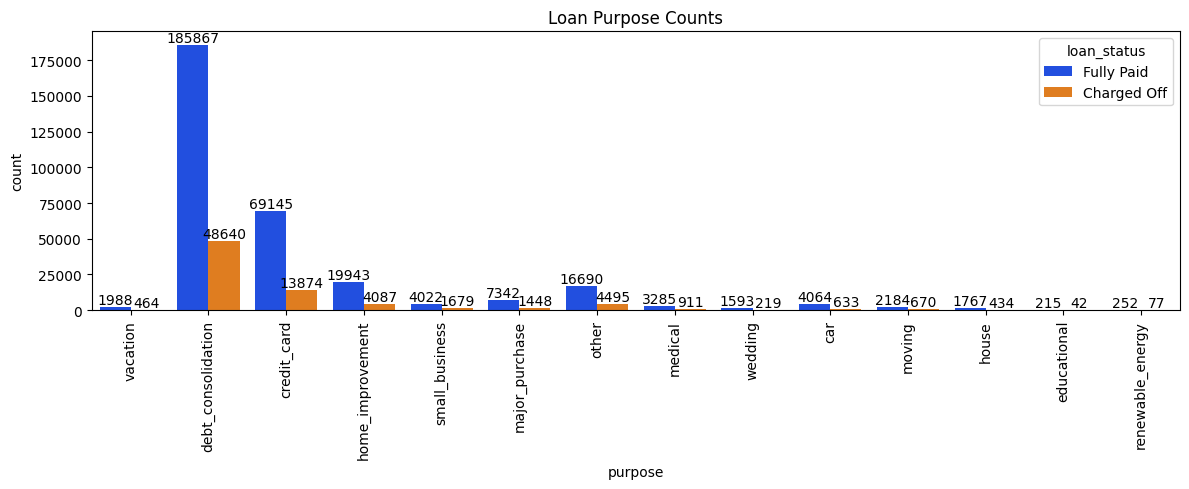

In [35]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(data=df, x=df['purpose'], hue='loan_status', palette='bright', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_title('Loan Purpose Counts')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.tight_layout()
plt.show()

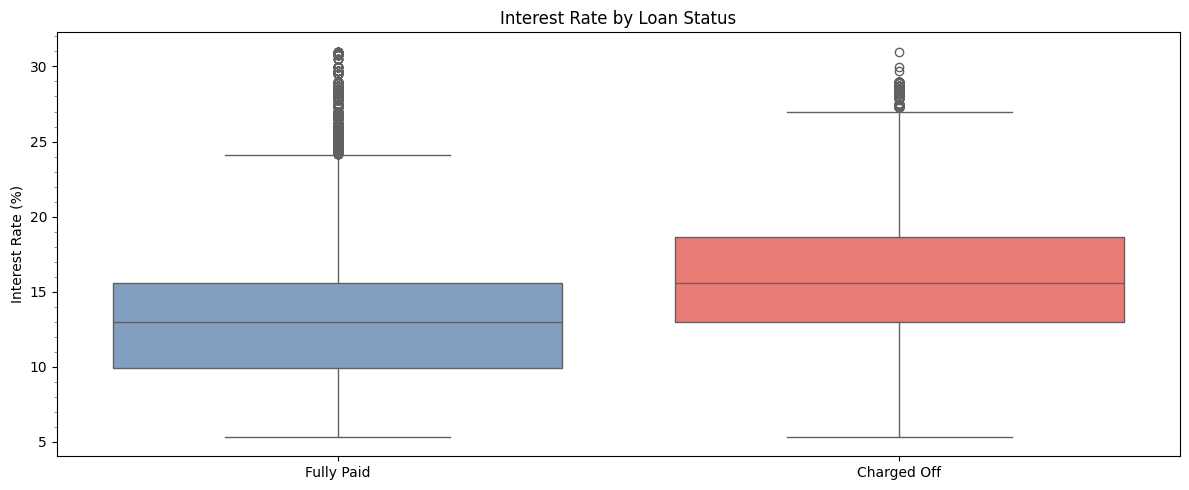

In [36]:
plt.figure(figsize=(12,5))
g = sns.boxplot(x='loan_status', y='int_rate', data=df, hue='loan_status', palette=['#779ECB', '#FF6961'])

g.yaxis.set_minor_locator(MultipleLocator(1))
g.tick_params(which='minor', length=2, color='gray')

plt.title("Interest Rate by Loan Status")
plt.xlabel('')
plt.ylabel('Interest Rate (%)')
plt.tight_layout()
plt.show()

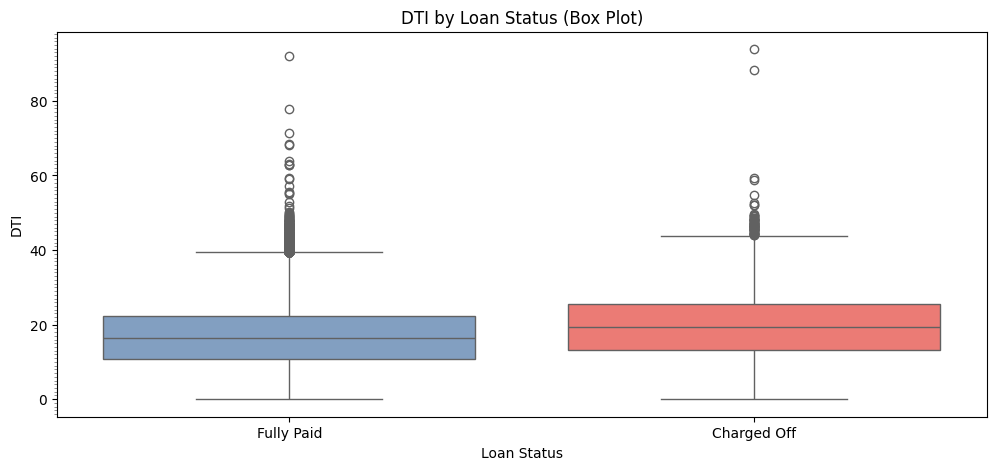

In [37]:
filtered_df = df[df['dti'] <= 100] 
plt.figure(figsize=(12, 5))
g = sns.boxplot(data=filtered_df, x='loan_status', y='dti', hue='loan_status', palette=['#779ECB', '#FF6961'])
g.yaxis.set_minor_locator(MultipleLocator(1))
g.tick_params(which='minor', length=2, color='gray')

plt.title('DTI by Loan Status (Box Plot)')
plt.xlabel('Loan Status'); plt.ylabel('DTI')
plt.show()


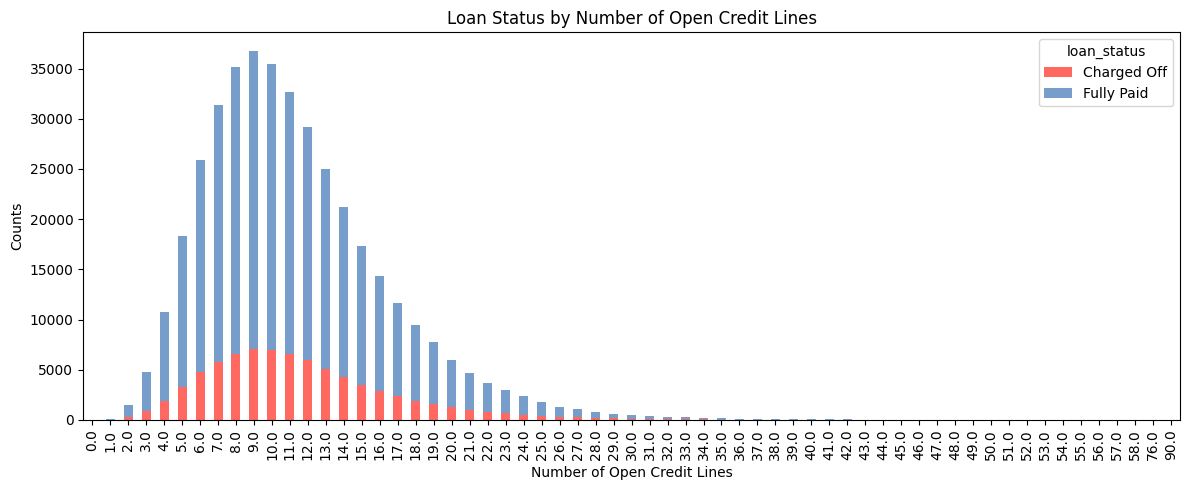

In [38]:
loan_status_by_open_credit_lines = pd.crosstab(df['open_acc'], df['loan_status'])
fig, ax = plt.subplots(figsize=(12, 5))
loan_status_by_open_credit_lines.plot(kind='bar', stacked=True, ax=ax, color=['#FF6961', '#779ECB'])
ax.set_title('Loan Status by Number of Open Credit Lines')
ax.set_xlabel('Number of Open Credit Lines')
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

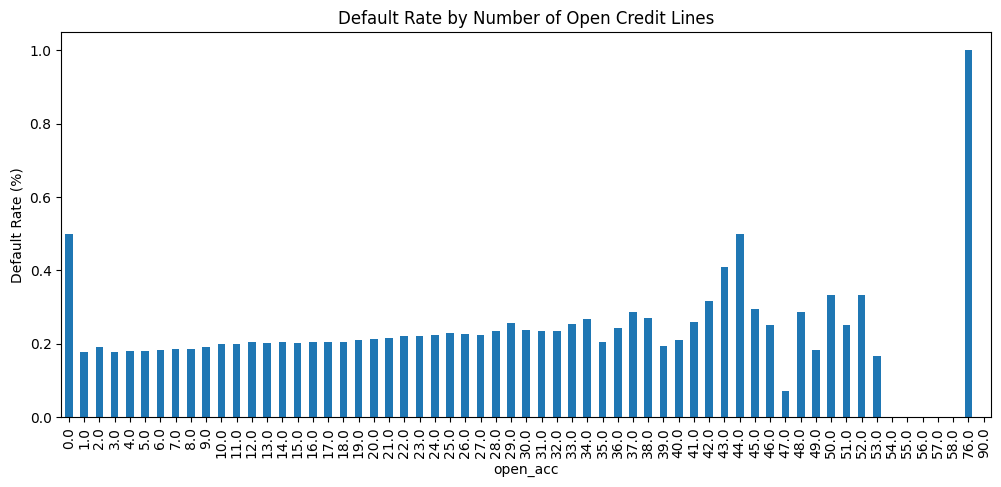

In [39]:
vc = df.groupby('open_acc')['loan_status'].value_counts(normalize=True)
default_rate = vc.unstack(fill_value=0)['Charged Off'] 
default_rate.plot(kind='bar', figsize=(12,5))
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Number of Open Credit Lines')
plt.show()


In [40]:
counts = df['open_acc'].value_counts().sort_index()
print(counts.head(10), counts.tail(10))

open_acc
0.0        6
1.0       85
2.0     1459
3.0     4783
4.0    10709
5.0    18308
6.0    25927
7.0    31328
8.0    35137
9.0    36779
Name: count, dtype: int64 open_acc
51.0    4
52.0    3
53.0    6
54.0    3
55.0    2
56.0    2
57.0    1
58.0    1
76.0    2
90.0    1
Name: count, dtype: int64


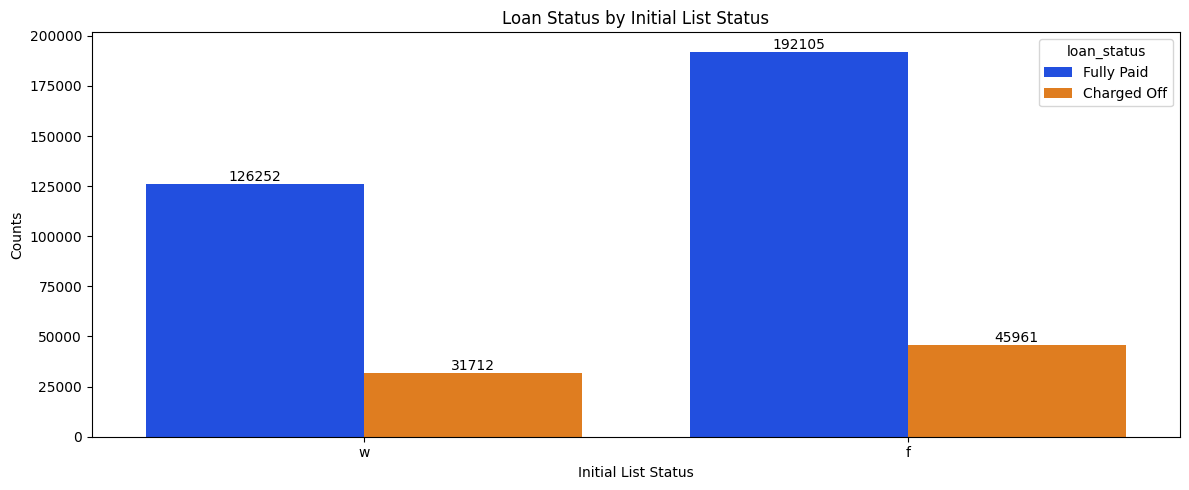

In [41]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(data=df, x=df['initial_list_status'], hue=df['loan_status'], palette='bright', ax=ax)
ax.set_title('Loan Status by Initial List Status')
ax.set_xlabel('Initial List Status')
ax.set_ylabel('Counts')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

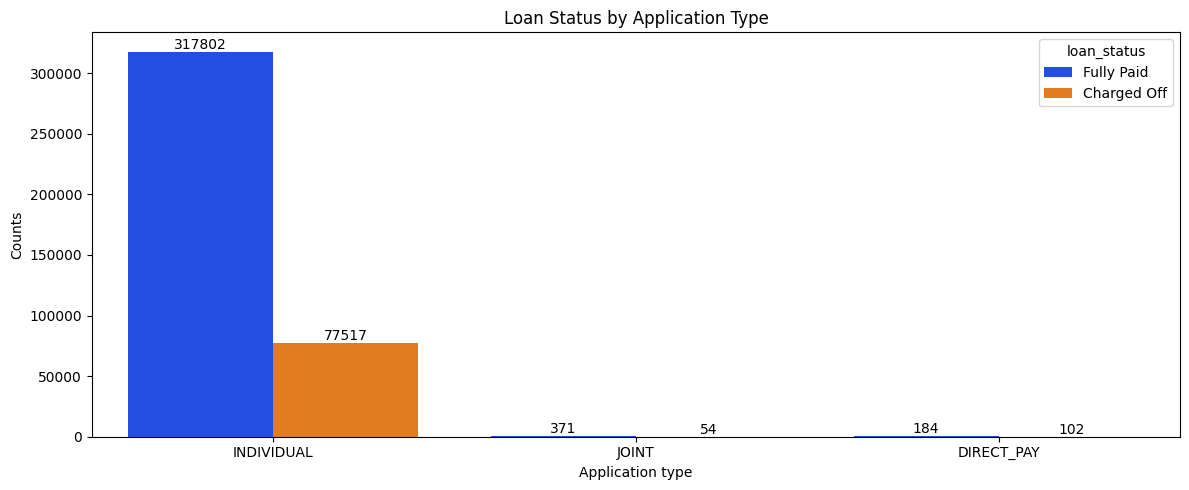

In [42]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(data=df, x=df['application_type'], hue=df['loan_status'], palette='bright')
ax.set_title('Loan Status by Application Type')
ax.set_xlabel('Application type')
ax.set_ylabel('Counts')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

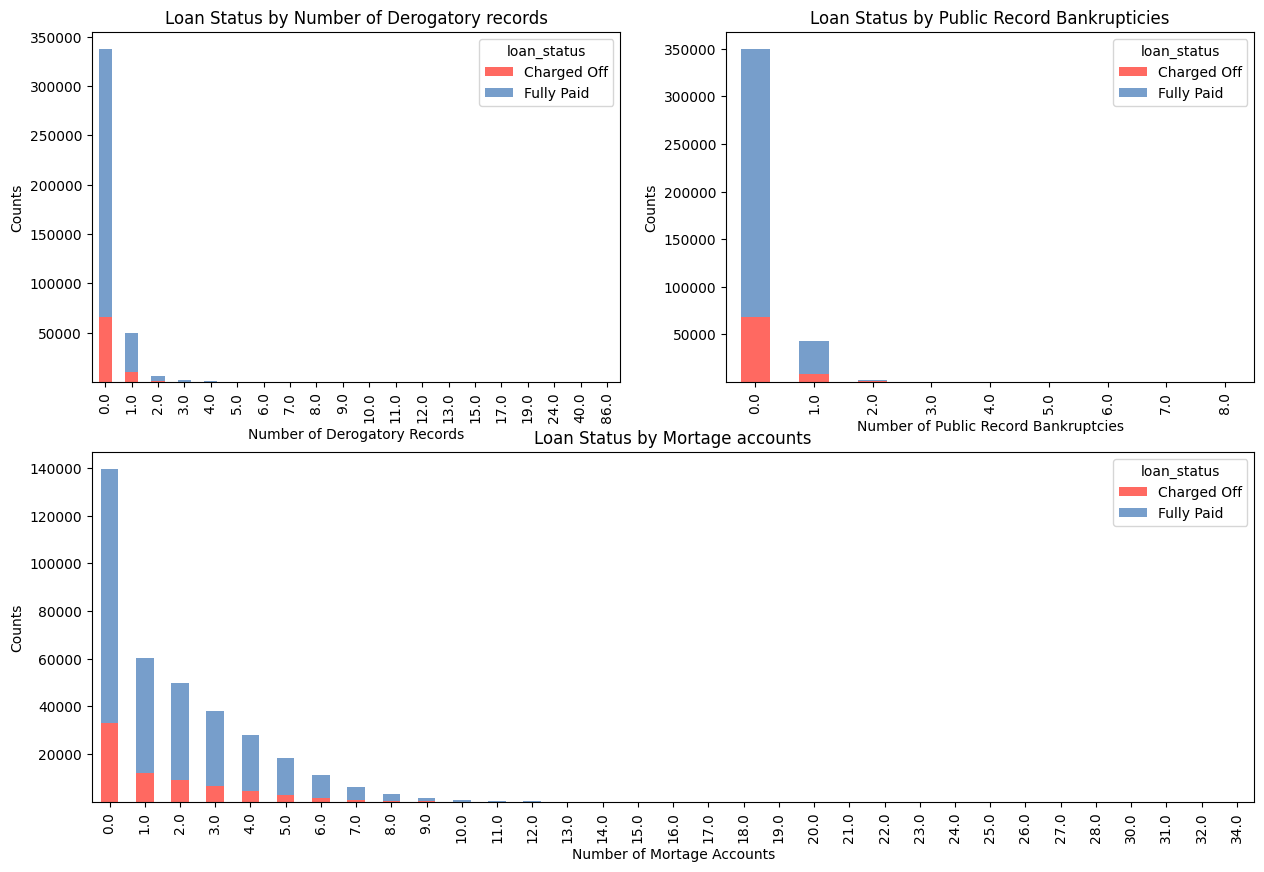

In [43]:
plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

loan_status_by_number_of_derogatory_records = pd.crosstab(df['pub_rec'], df['loan_status'])
loan_status_by_number_of_derogatory_records.plot(kind='bar', stacked=True, color=['#FF6961', '#779ECB'], ax=ax1)
ax1.set_title('Loan Status by Number of Derogatory records')
ax1.set_xlabel('Number of Derogatory Records')
ax1.set_ylabel('Counts')


loan_status_by_number_of_record_bankruptcies = pd.crosstab(df['pub_rec_bankruptcies'], df['loan_status'])
loan_status_by_number_of_record_bankruptcies.plot(kind='bar', stacked=True, color=['#FF6961', '#779ECB'], ax=ax2)
ax2.set_title('Loan Status by Public Record Bankrupticies')
ax2.set_xlabel('Number of Public Record Bankruptcies')
ax2.set_ylabel('Counts')


loan_status_by_number_of_mortage_accounts = pd.crosstab(df['mort_acc'], df['loan_status'])
loan_status_by_number_of_mortage_accounts.plot(kind='bar', stacked=True, color=['#FF6961', '#779ECB'], ax=ax3)
ax3.set_title('Loan Status by Mortage accounts')
ax3.set_xlabel('Number of Mortage Accounts')
ax3.set_ylabel('Counts')


In [44]:
print(f"Number of Unique Job Titles: {df.emp_title.nunique()}")
print('-------------------------------------------------------')
print('Top 20 Job Titles by Count')
print(df['emp_title'].value_counts()[:20])

Number of Unique Job Titles: 173105
-------------------------------------------------------
Top 20 Job Titles by Count
emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64


In [45]:
print('Job Length Categories')
print(df['emp_length'].unique())

Job Length Categories
['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


### Data Preprocessing

In [46]:
print(f"Shape of the data: {df.shape}")

Shape of the data: (396030, 27)


In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df['pub_rec'] = df['pub_rec'].where(df['pub_rec'].isna(), (df['pub_rec'] > 0).astype(int))
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].where(df['pub_rec_bankruptcies'].isna(), (df['pub_rec_bankruptcies'] > 0).astype(int))
df['mort_acc'] = df['mort_acc'].where(df['mort_acc'].isna(), (df['mort_acc'] > 0).astype(int))
print(df['pub_rec'].value_counts())

pub_rec
0.0    338272
1.0     57758
Name: count, dtype: int64


In [49]:
df['pub_rec'] = df['pub_rec'].astype(int)
print(df['pub_rec'].value_counts())

pub_rec
0    338272
1     57758
Name: count, dtype: int64


In [50]:
for col in df.columns: 
    if df[col].isna().sum() != 0:
        missing = df[col].isna().sum()
        per_missing = (missing / df.shape [0]) * 100

        print(f"Number of missing values in  {col}: {missing}")
        print(f"Percentage of missing values: {per_missing:.3f}%")

Number of missing values in  emp_title: 22927
Percentage of missing values: 5.789%
Number of missing values in  emp_length: 18301
Percentage of missing values: 4.621%
Number of missing values in  title: 1756
Percentage of missing values: 0.443%
Number of missing values in  revol_util: 276
Percentage of missing values: 0.070%
Number of missing values in  mort_acc: 37795
Percentage of missing values: 9.543%
Number of missing values in  pub_rec_bankruptcies: 535
Percentage of missing values: 0.135%


In [51]:
print(f"Number of unique values in 'emp_title': {df['emp_title'].nunique()}")

Number of unique values in 'emp_title': 173105


The are too many unique values in the 'emp_title' feature to try to convert to a dummy value. So it will be removed

In [52]:
df.drop('emp_title', axis=1, inplace=True)

In [53]:
print(f"Number of unique values in 'emp_length: {df['emp_length'].nunique()}")
print(f"Unique values in 'emp_length': {df['emp_length'].unique()}")


Number of unique values in 'emp_length: 11
Unique values in 'emp_length': ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


In [54]:
for year in df['emp_length'].unique():
    print(f"{year} in this position:")
    counts = df[df['emp_length'] == year]['loan_status'].value_counts(normalize=True).round(2)
    print(counts)
    print('-----------------------------------------')

10+ years in this position:
loan_status
Fully Paid     0.82
Charged Off    0.18
Name: proportion, dtype: float64
-----------------------------------------
4 years in this position:
loan_status
Fully Paid     0.81
Charged Off    0.19
Name: proportion, dtype: float64
-----------------------------------------
< 1 year in this position:
loan_status
Fully Paid     0.79
Charged Off    0.21
Name: proportion, dtype: float64
-----------------------------------------
6 years in this position:
loan_status
Fully Paid     0.81
Charged Off    0.19
Name: proportion, dtype: float64
-----------------------------------------
9 years in this position:
loan_status
Fully Paid     0.8
Charged Off    0.2
Name: proportion, dtype: float64
-----------------------------------------
2 years in this position:
loan_status
Fully Paid     0.81
Charged Off    0.19
Name: proportion, dtype: float64
-----------------------------------------
3 years in this position:
loan_status
Fully Paid     0.8
Charged Off    0.2
Name:

Default rates are comparable across all employment lengths, so it can be removed.

In [55]:
df.drop('emp_length', axis=1, inplace=True)

In [56]:
print(df['title'].value_counts().head())
print('--------------------------------')
print(df['purpose'].value_counts().head())

title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Name: count, dtype: int64
--------------------------------
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: count, dtype: int64


The title column is essentially a string subcategory/description of the purpose column. so we drop it

In [57]:
df.drop('title', axis=1, inplace=True)

In [58]:
df['mort_acc'].value_counts()

mort_acc
1.0    218458
0.0    139777
Name: count, dtype: int64

In [59]:
df['mort_acc'].isna().sum()

np.int64(37795)

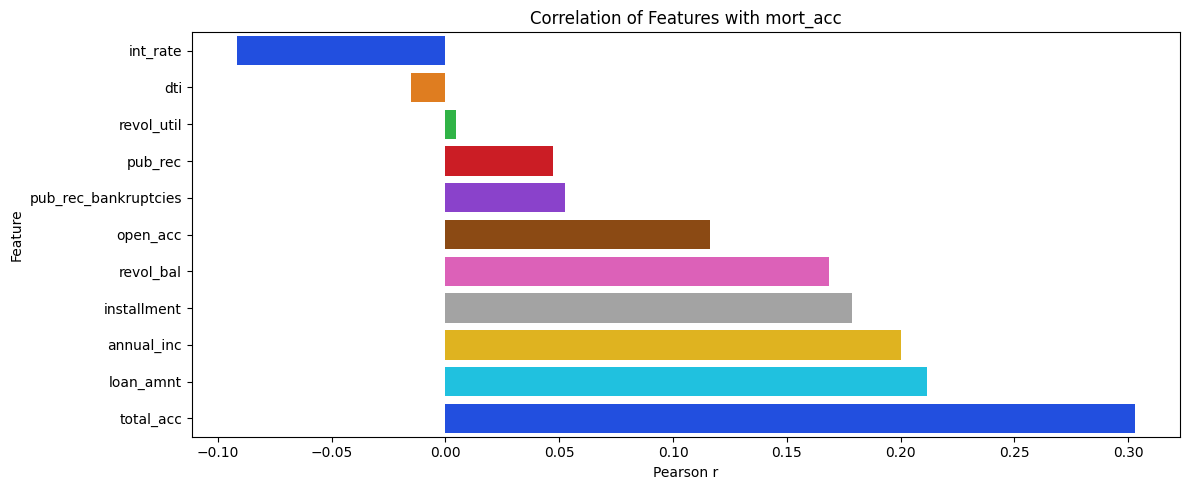

In [60]:
corr_series = (
    df.corr(numeric_only=True)['mort_acc'].drop('mort_acc').sort_values()
)

plt.figure(figsize=(12, 5))
sns.barplot(
    x=corr_series.values,
    y=corr_series.index,
    hue=corr_series.index,
    palette='bright'
)

plt.title("Correlation of Features with mort_acc")
plt.xlabel("Pearson r")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [61]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()
total_acc_avg = total_acc_avg.round()
print(total_acc_avg)

total_acc
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
6.0      0.0
        ... 
124.0    1.0
129.0    1.0
135.0    1.0
150.0    1.0
151.0    0.0
Name: mort_acc, Length: 118, dtype: float64


In [62]:
df['mort_acc'] = df['mort_acc'].fillna(df['total_acc'].map(total_acc_avg))
df['mort_acc'] = df['mort_acc'].astype(int)

In [63]:
df['mort_acc'].value_counts()

mort_acc
1    242794
0    153236
Name: count, dtype: int64

revol_util & pub_rec_bankrupticies missing values in total amount to 0.205% of the data so we can remove the records with those missing values

In [64]:
df.dropna(inplace=True)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int)

In [65]:
print(df['grade'].unique())
print(df['sub_grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']
['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


sub_grade gives finer detial (A1 to G5) i.e. each grade has 5 subgrades. So we will drop the grade feature. 

In [66]:
df.drop('grade', axis=1, inplace=True)

### Detecting and removing outliers

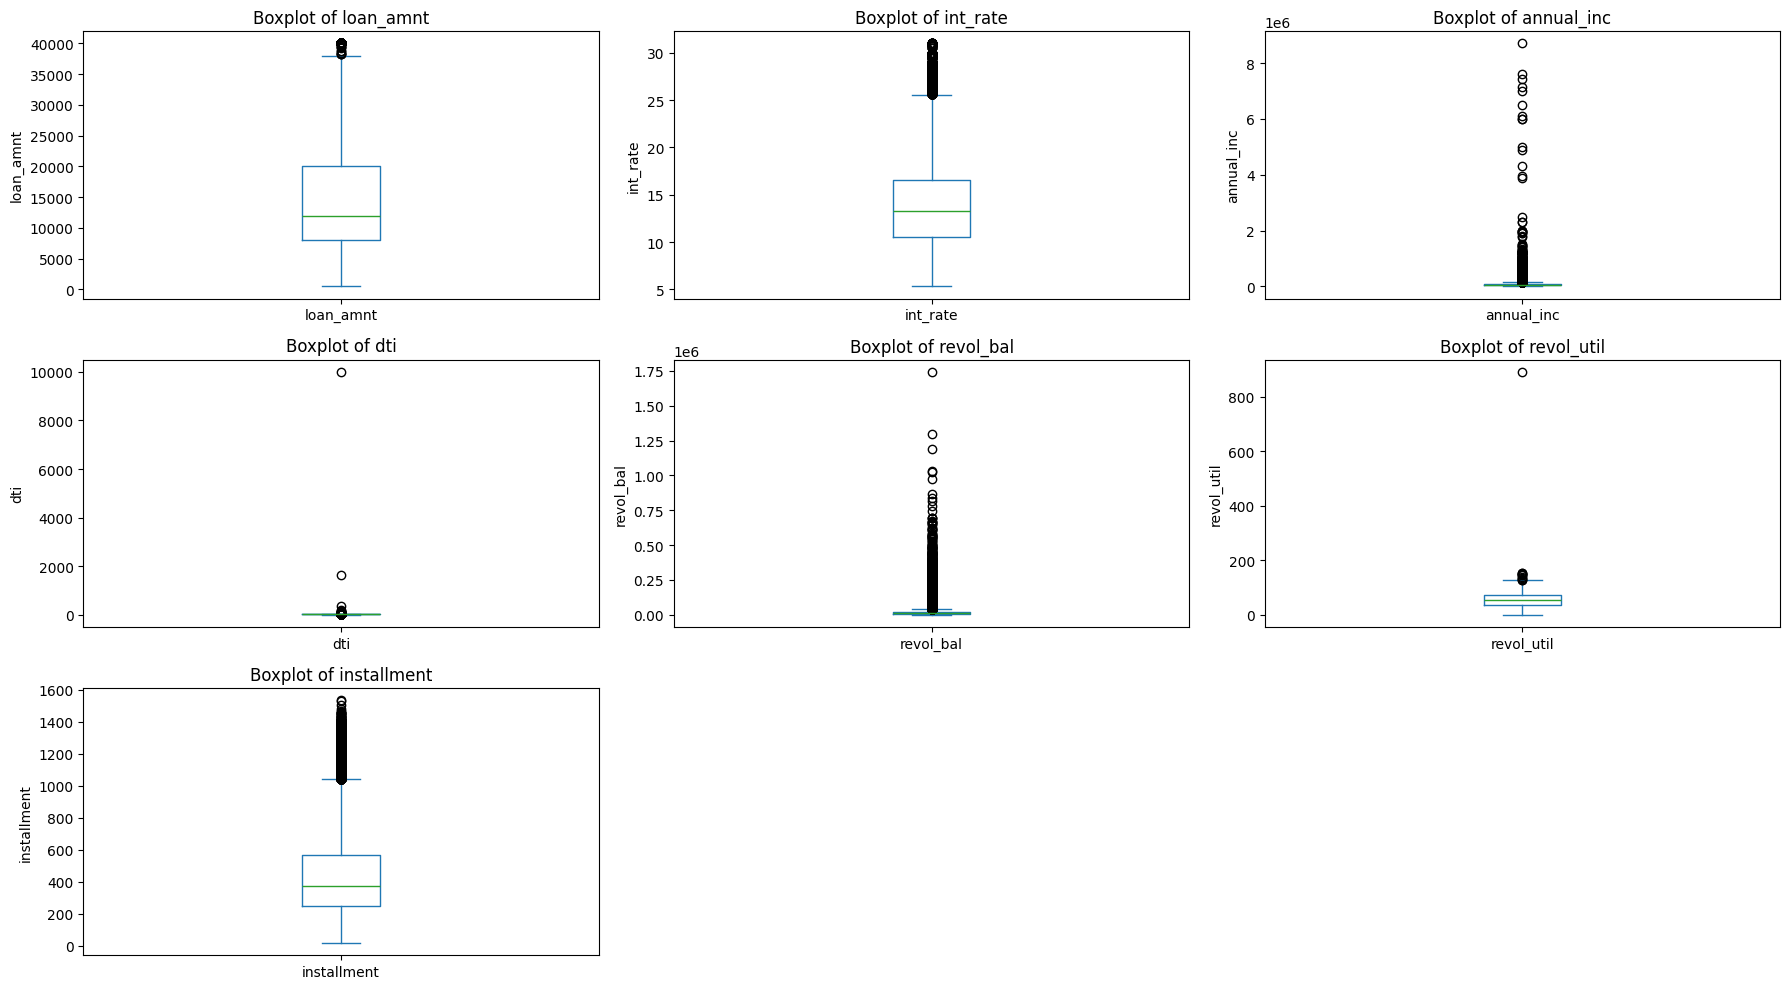

In [67]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'installment']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))  

for ax, col in zip(axes.flatten(), cols):
    df[col].plot.box(ax=ax)
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel(col)

if len(cols) < len(axes.flatten()):
    axes.flatten()[-1].axis('off')
    axes.flatten()[-2].axis('off')

plt.tight_layout()
plt.show()



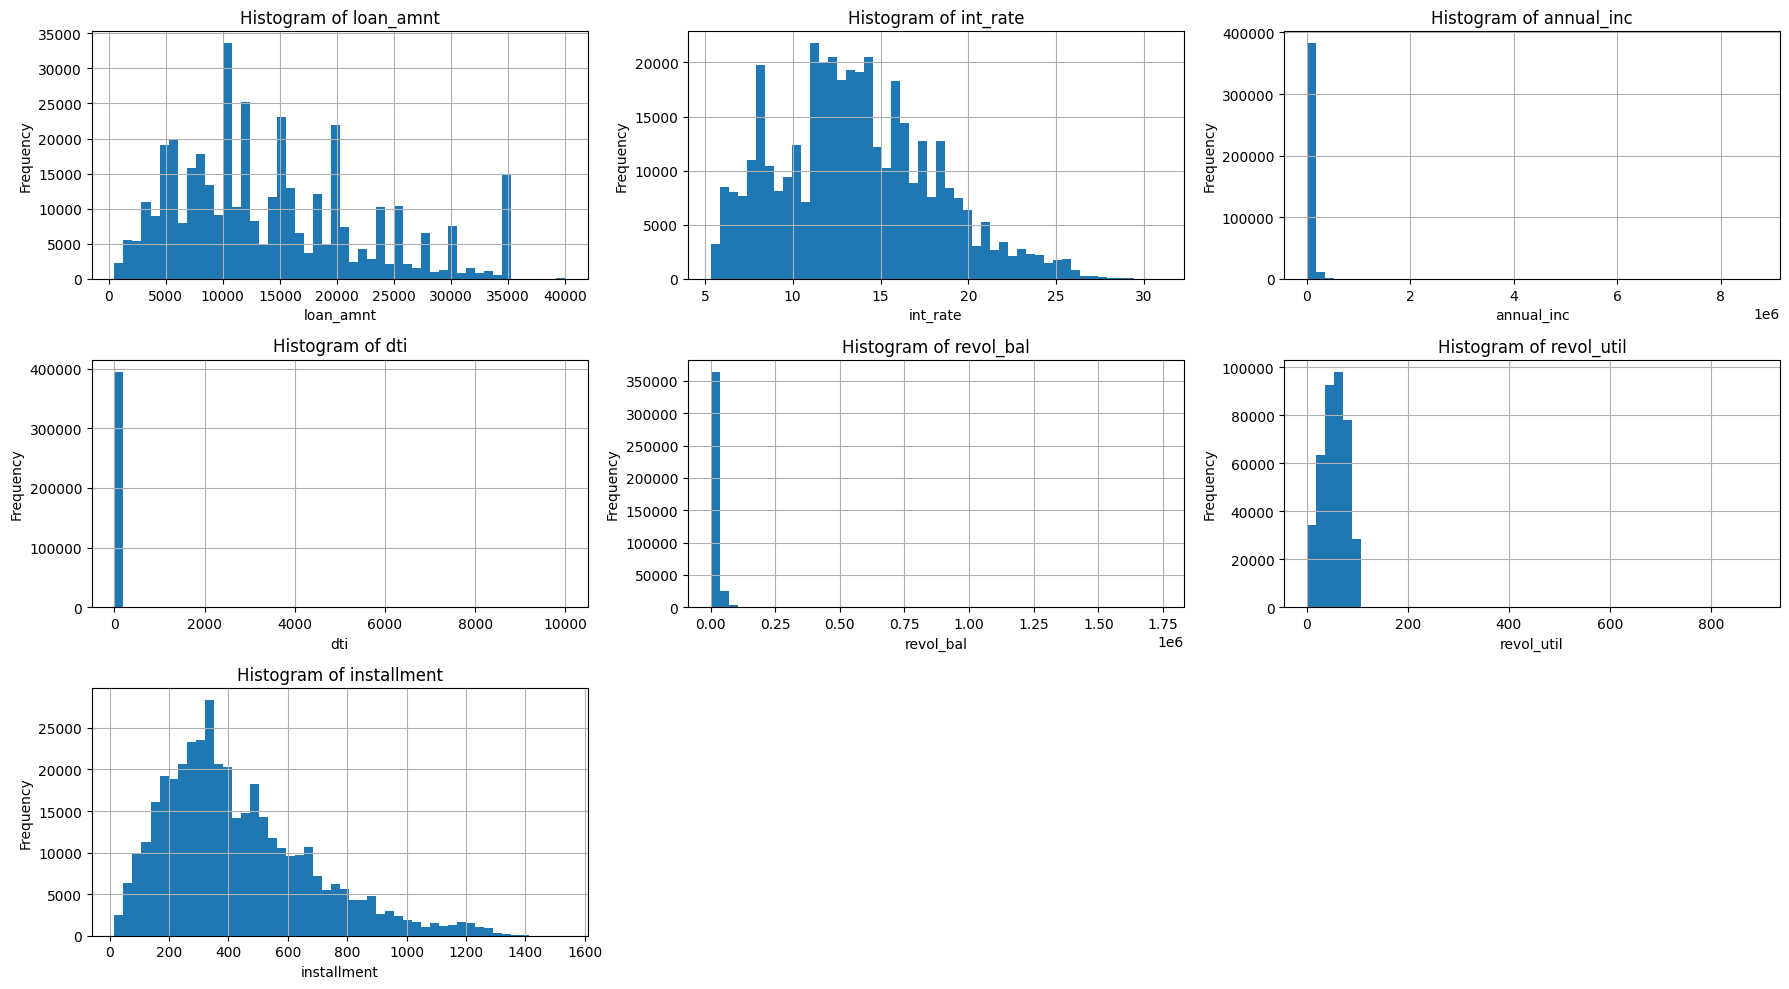

In [68]:
import matplotlib.pyplot as plt

cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util' , 'installment']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))  

for ax, col in zip(axes.flatten(), cols):
    df[col].hist(bins=50, ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

if len(cols) < len(axes.flatten()):
    axes.flatten()[-1].axis('off')
    axes.flatten()[-2].axis('off')

plt.tight_layout()
plt.show()


In [69]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'installment']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]


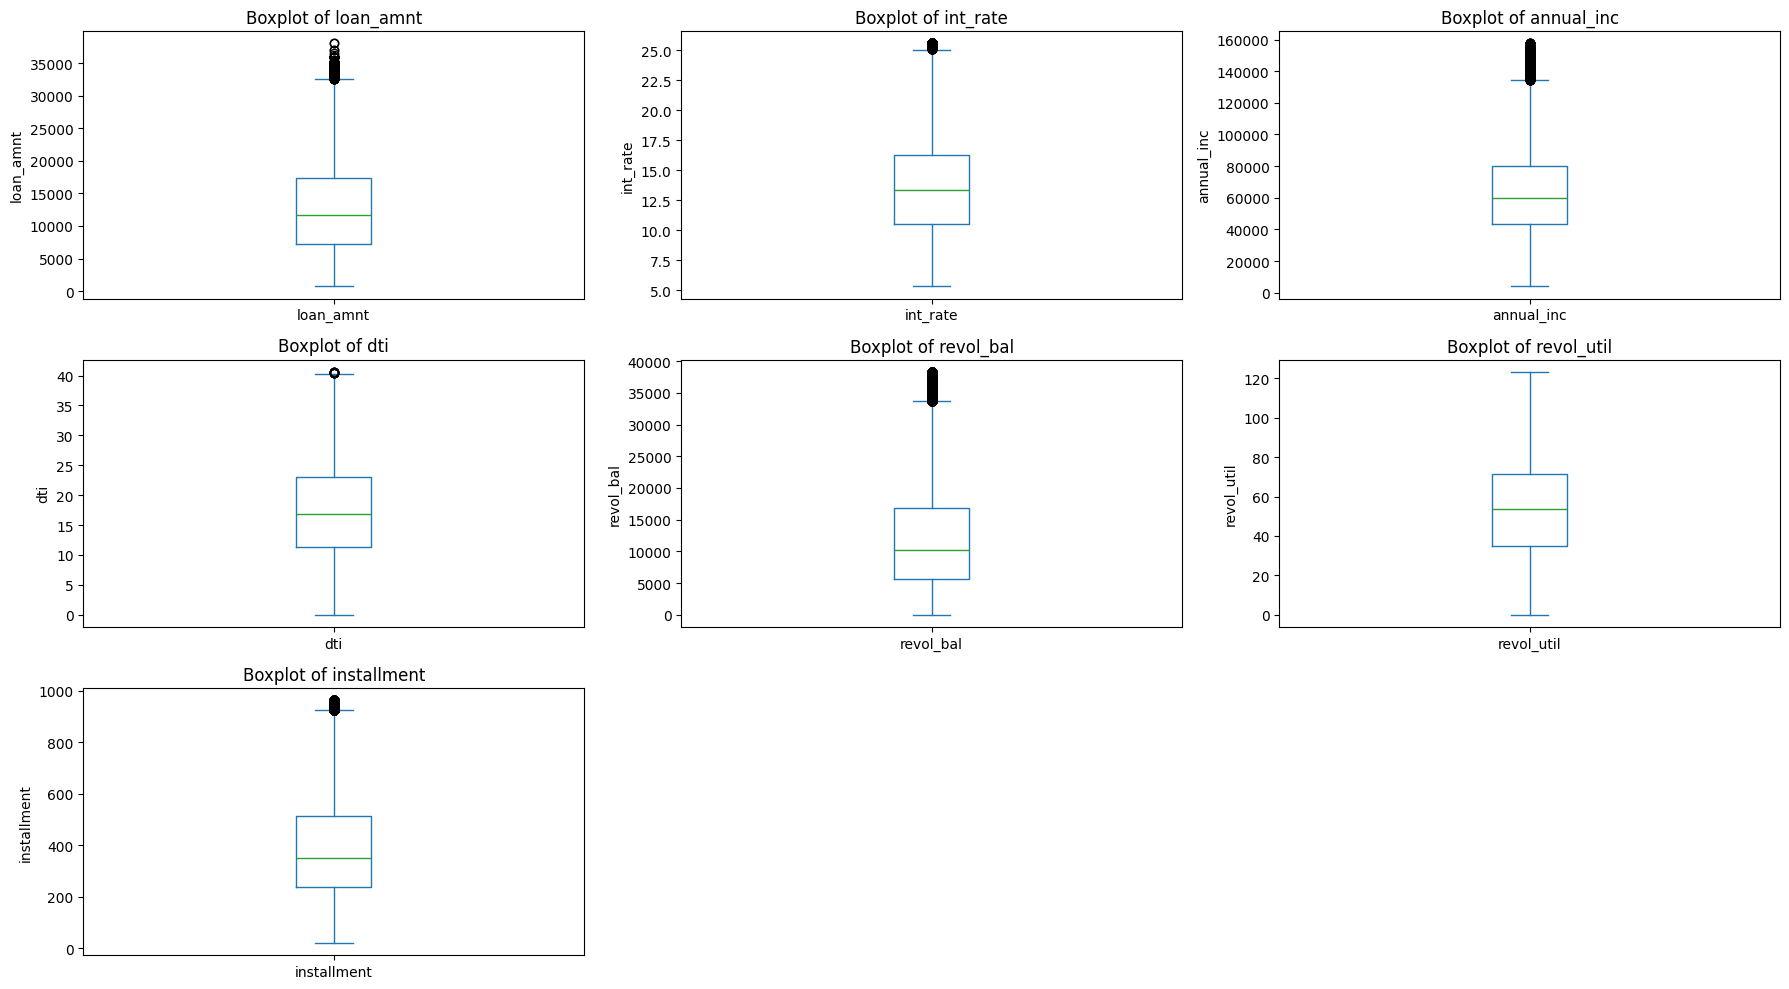

In [70]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'installment']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))  

for ax, col in zip(axes.flatten(), cols):
    df[col].plot.box(ax=ax)
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel(col)

if len(cols) < len(axes.flatten()):
    axes.flatten()[-1].axis('off')
    axes.flatten()[-2].axis('off')

plt.tight_layout()
plt.show()



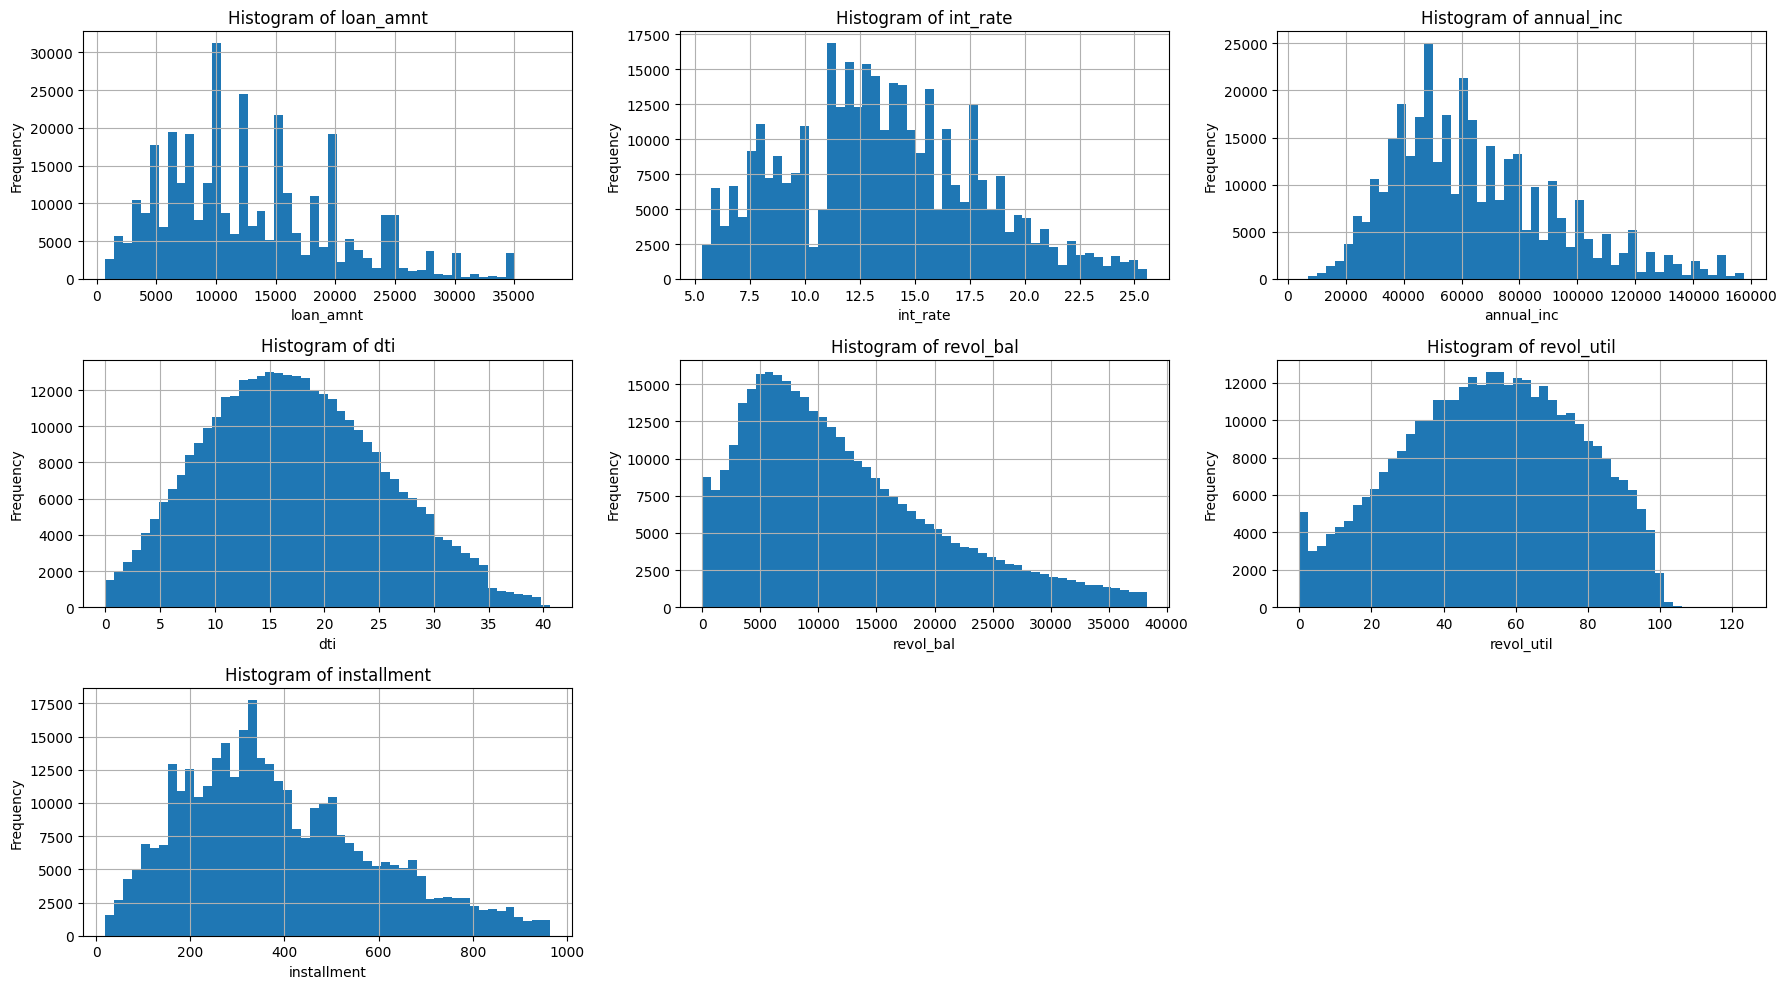

In [71]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'installment']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))  

for ax, col in zip(axes.flatten(), cols):
    df[col].hist(bins=50, ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")


if len(cols) < len(axes.flatten()):
    axes.flatten()[-1].axis('off')
    axes.flatten()[-2].axis('off')

plt.tight_layout()
plt.show()


In [72]:
df['annual_inc_log'] = np.log1p(df['annual_inc'])
df['revol_bal_log'] = np.log1p(df['revol_bal'])

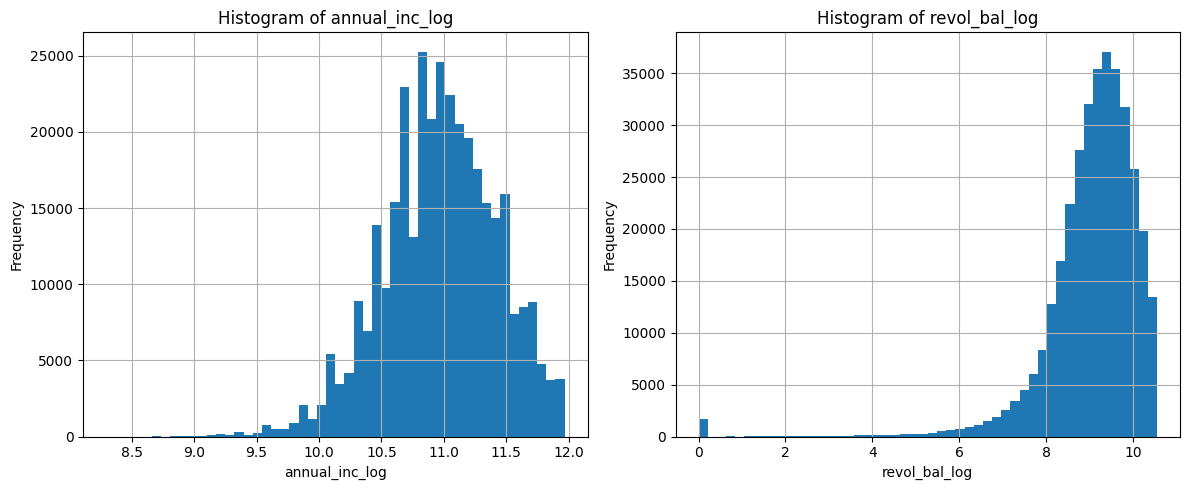

In [73]:
import matplotlib.pyplot as plt

cols = ['annual_inc_log', 'revol_bal_log']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  

for ax, col in zip(axes.flatten(), cols):
    df[col].hist(bins=50, ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [74]:
df.drop(['annual_inc', 'revol_bal'], axis=1, inplace=True)

In [75]:
df.shape

(346891, 23)

### Data Encoding

In [76]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [77]:
df['term'] = df['term'].str.extract(r'(\d+)').astype(int)
print(df['term'].unique())

[36 60]


In [78]:
desired_order = [
    'A1','A2','A3','A4','A5',
    'B1','B2','B3','B4','B5',
    'C1','C2','C3','C4','C5',
    'D1','D2','D3','D4','D5',
    'E1','E2','E3','E4','E5',
    'F1','F2','F3','F4','F5',
    'G1','G2','G3','G4','G5'
]

le = LabelEncoder().fit(desired_order)
df['sub_grade_enc'] = le.transform(df['sub_grade'])

In [79]:
for i, cat in enumerate(le.classes_):
    print(cat, '→', i)

A1 → 0
A2 → 1
A3 → 2
A4 → 3
A5 → 4
B1 → 5
B2 → 6
B3 → 7
B4 → 8
B5 → 9
C1 → 10
C2 → 11
C3 → 12
C4 → 13
C5 → 14
D1 → 15
D2 → 16
D3 → 17
D4 → 18
D5 → 19
E1 → 20
E2 → 21
E3 → 22
E4 → 23
E5 → 24
F1 → 25
F2 → 26
F3 → 27
F4 → 28
F5 → 29
G1 → 30
G2 → 31
G3 → 32
G4 → 33
G5 → 34


In [80]:
df.drop('sub_grade', axis=1, inplace=True)

In [81]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,annual_inc_log,revol_bal_log,sub_grade_enc
0,10000.0,36,11.44,329.48,RENT,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\nMendozaberg, OK 22690",11.669938,10.501500,8
1,8000.0,36,11.99,265.68,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",11.082158,9.910066,9
2,15600.0,36,10.49,506.97,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",10.670303,9.391661,7
3,7200.0,36,6.49,220.65,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\nDelacruzside, MA 00813",10.896758,8.607582,1
4,24375.0,60,17.27,609.33,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0,69.8,43.0,f,INDIVIDUAL,1,0,"679 Luna Roads\nGreggshire, VA 11650",10.915107,10.109892,14


In [82]:
dummies = ['application_type', 'home_ownership', 'initial_list_status', 'purpose', 'verification_status']

ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)

encoded_array = ohe.fit_transform(df[dummies])
encoded_cols = ohe.get_feature_names_out(dummies)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

df = pd.concat([df.drop(columns=dummies), encoded_df], axis=1)

In [83]:
df.head()

,loan_amnt,term,int_rate,installment,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,annual_inc_log,revol_bal_log,sub_grade_enc,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified
0,10000.0,36,11.44,329.48,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0,41.8,25.0,0,0,"0174 Michelle Gateway\nMendozaberg, OK 22690",11.669938,10.501500,8,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8000.0,36,11.99,265.68,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0,53.3,27.0,1,0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",11.082158,9.910066,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0,92.2,26.0,0,0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",10.670303,9.391661,7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0,21.5,13.0,0,0,"823 Reid Ford\nDelacruzside, MA 00813",10.896758,8.607582,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0,69.8,43.0,1,0,"679 Luna Roads\nGreggshire, VA 11650",10.915107,10.109892,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Feature Engineering

In [84]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [85]:
df['zip_code'] = df['address'].str.extract(r'(\d{5})$')

In [86]:
df['zip_code'].nunique()

10

In [87]:
zip_array = ohe.fit_transform(df[['zip_code']])
zip_cols = ohe.get_feature_names_out(['zip_code'])
zip_dummies = pd.DataFrame(zip_array, columns=zip_cols, index=df.index)

df = pd.concat([df.drop(columns=['zip_code']), zip_dummies], axis=1)

In [88]:
df.drop('address', axis=1, inplace=True)

In [89]:
df.head()

,loan_amnt,term,int_rate,installment,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,annual_inc_log,revol_bal_log,sub_grade_enc,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0,41.8,25.0,0,0,11.669938,10.501500,8,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0,53.3,27.0,1,0,11.082158,9.910066,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0,92.2,26.0,0,0,10.670303,9.391661,7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0,21.5,13.0,0,0,10.896758,8.607582,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0,69.8,43.0,1,0,10.915107,10.109892,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [90]:
print('Time loan was issued')
print(df['issue_d'].head(1))
print('---------------------------')
print('Earliest credit line')
print(df['earliest_cr_line'].head(1))

Time loan was issued
0    Jan-2015
Name: issue_d, dtype: object
---------------------------
Earliest credit line
0    Jun-1990
Name: earliest_cr_line, dtype: object


In [91]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
print('Time loan was issued')
print(df['issue_d'].head(1))
print('---------------------------')
print('Earliest credit line')
print(df['earliest_cr_line'].head(1))

Time loan was issued
0   2015-01-01
Name: issue_d, dtype: datetime64[ns]
---------------------------
Earliest credit line
0   1990-06-01
Name: earliest_cr_line, dtype: datetime64[ns]


In [92]:
df['cred_hist_yrs'] = (
    (df['issue_d'] - df['earliest_cr_line']) 
    .dt.days
    .div(365)
    .astype(float)
)

df.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)
df['cred_hist_yrs'] = df['cred_hist_yrs'].round(1)
print(df['cred_hist_yrs'].head())

0    24.6
1    10.5
2     7.4
3     8.2
4    14.1
Name: cred_hist_yrs, dtype: float64


In [93]:
print('Target variable value count')
print(df['loan_status'].value_counts())
print('----------------------------------------')
print('Target variable value count percentages')
print(df['loan_status'].value_counts(normalize=True).round(2))

Target variable value count
loan_status
Fully Paid     278866
Charged Off     68025
Name: count, dtype: int64
----------------------------------------
Target variable value count percentages
loan_status
Fully Paid     0.8
Charged Off    0.2
Name: proportion, dtype: float64


In [94]:
df['loan_status'] = df['loan_status'].map({
    'Fully Paid': 1,
    'Charged Off': 0,
})

In [95]:
print('Target variable value count')
print(df['loan_status'].value_counts())

Target variable value count
loan_status
1    278866
0     68025
Name: count, dtype: int64


In [96]:
df.head()

,loan_amnt,term,int_rate,installment,loan_status,dti,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,annual_inc_log,revol_bal_log,sub_grade_enc,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,cred_hist_yrs
0,10000.0,36,11.44,329.48,1,26.24,16.0,0,41.8,25.0,0,0,11.669938,10.501500,8,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,24.6
1,8000.0,36,11.99,265.68,1,22.05,17.0,0,53.3,27.0,1,0,11.082158,9.910066,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10.5
2,15600.0,36,10.49,506.97,1,12.79,13.0,0,92.2,26.0,0,0,10.670303,9.391661,7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,7.4
3,7200.0,36,6.49,220.65,1,2.60,6.0,0,21.5,13.0,0,0,10.896758,8.607582,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.2
4,24375.0,60,17.27,609.33,0,33.95,13.0,0,69.8,43.0,1,0,10.915107,10.109892,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,14.1


### Model Development

In [138]:
from sklearn.model_selection import train_test_split

x = df.drop('loan_status', axis=1) 
y = df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)


print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

loan_status
1    0.8039
0    0.1961
Name: proportion, dtype: float64
loan_status
1    0.803903
0    0.196097
Name: proportion, dtype: float64


In [564]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [565]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8886


In [566]:
from sklearn.metrics import roc_auc_score
y_pred_proba_baseline = rf.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_baseline)
print(roc_auc)


0.8938475183494706


In [567]:
from sklearn.metrics import roc_auc_score
import time
from tqdm import tqdm

def permutation_importance_ranking(model, x_test, y_test, one_hot_group=None,
                                    individual_features=None, n_repeats=50, random_state=42,
                                    ):
    print("Starting Permutation Importance with Pre-trained Model...")
    start_time = time.time()

    score_func = lambda y_true, y_pred: roc_auc_score(y_true, y_pred)

    print(f"Calculating baseline roc_auc...")
    y_pred_proba_baseline = model.predict_proba(x_test)[:, 1]
    baseline_score = score_func(y_test, y_pred_proba_baseline)
    print(f"Baseline ROC_AUC: {baseline_score:.4f}")

    features_to_rank = []
    if one_hot_group:
        for group_name, group_features in one_hot_group.items():
            existing_features = [f for f in group_features if f in x_test.columns]
            if existing_features:
                features_to_rank.append((group_name, existing_features))

    if individual_features:
        for feature in individual_features:
            if feature in x_test.columns:
                features_to_rank.append((feature, [feature]))

    total_iterations = len(features_to_rank) * n_repeats
    print(f"Ranking {len(features_to_rank)} features with {n_repeats} repeats each")

    progress_bar = tqdm(total=total_iterations, desc="Calculating Importances")

    feature_importance = {}

    for feature_name, feature_cols in features_to_rank:
        importance_scores = []

        for i in range(n_repeats):
            x_test_permuted = x_test.copy()
            np.random.seed(random_state + i)

            for col in feature_cols:
                if col in x_test_permuted.columns: 
                    x_test_permuted[col] = np.random.permutation(x_test_permuted[col].values)

            y_pred_proba_permuted = model.predict_proba(x_test_permuted)[:, 1]
            permuted_score = score_func(y_test, y_pred_proba_permuted)

            importance = baseline_score - permuted_score
            importance_scores.append(importance)

            progress_bar.update(1)
        
        feature_importance[feature_name] = {
            'importance': np.mean(importance_scores),
            'std': np.std(importance_scores)
        }

    progress_bar.close()

    results = []
    for feature_name, data in feature_importance.items():
        results.append({
            'Feature': feature_name,
            'Importance': data['importance'],
            'Std': data['std']
        })

    df_results = pd.DataFrame(results)
    df_results = df_results.sort_values('Importance', ascending=False).reset_index(drop=True)
    df_results['Rank'] = range(1, len(df_results) + 1)

    total_time = time.time() - start_time
    print(f"Feature ranking completed in {total_time:.2f} seconds")

    return df_results

In [568]:
one_hot_groups = {
    'application_type': ['application_type_INDIVIDUAL', 'application_type_JOINT'],
    'home_ownership': ['home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
    'initial_list_status': ['initial_list_status_w'],
    'purpose': ['purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational',
                'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical',
                'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
                'purpose_vacation', 'purpose_wedding'],
    'verification_status': ['verification_status_Source Verified', 'verification_status_Verified'],
    'zip_code': ['zip_code_05113', 'zip_code_11650', 'zip_code_22690', 'zip_code_29597', 'zip_code_30723', 'zip_code_48052', 'zip_code_70466', 'zip_code_86630', 'zip_code_93700']
}

individual = ['loan_amnt', 'term', 'int_rate', 'installment', 'dti', 'open_acc', 'pub_rec', 'revol_util',
                'total_acc', 'mort_acc', 'pub_rec_bankruptcies','annual_inc_log', 
                'revol_bal_log', 'sub_grade_enc', 'cred_hist_yrs']

feature_rankings = permutation_importance_ranking(rf, x_test, y_test, one_hot_group=one_hot_groups,
                                                    individual_features=individual)

top_21_features = feature_rankings.head(21)
print("Top 21 Feature Rankings:")
print(top_21_features)

Starting Permutation Importance with Pre-trained Model...
Calculating baseline roc_auc...
Baseline ROC_AUC: 0.8938
Ranking 21 features with 50 repeats each


Calculating Importances: 100%|██████████| 1050/1050 [41:04<00:00,  2.35s/it]

Feature ranking completed in 2466.87 seconds
Top 21 Feature Rankings:
                 Feature  Importance       Std  Rank
0               zip_code    0.280288  0.002602     1
1          sub_grade_enc    0.014926  0.000652     2
2               int_rate    0.005709  0.000500     3
3         annual_inc_log    0.005584  0.000457     4
4                   term    0.003759  0.000312     5
5                    dti    0.003357  0.000418     6
6          revol_bal_log    0.001325  0.000254     7
7             revol_util    0.001053  0.000282     8
8               mort_acc    0.001011  0.000243     9
9         home_ownership    0.001007  0.000276    10
10             loan_amnt    0.000901  0.000267    11
11         cred_hist_yrs    0.000866  0.000239    12
12           installment    0.000815  0.000266    13
13               purpose    0.000501  0.000207    14
14             total_acc    0.000489  0.000234    15
15              open_acc    0.000399  0.000203    16
16   initial_list_status    0

In [570]:
importance = top_21_features.copy()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report


importance['Actual_column_count'] = [9, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 13, 1, 1, 1, 1, 2, 1, 2]
importance['Cummulative_columns'] = importance['Actual_column_count'].cumsum()

print('Feature Importance summary')
print("Feature".ljust(22), "Importance".ljust(12), "Columns".ljust(8), "Cum_cols")
print('-'*50)
for i, row in importance.head(21).iterrows():
    print(f"{row['Feature']:<22} {row['Importance']:<12.6f} {row['Actual_column_count']:<8} {row['Cummulative_columns']}")

def get_feature_columns_for_groups(feature_importance_data, one_hot_groups): 
    all_columns = []
    for feature in feature_importance_data:
        if feature in one_hot_groups:
            all_columns.extend(one_hot_groups[feature])
        else:
            all_columns.append(feature)
    return all_columns

def evaluate_feature_subsets(x, y, features_ordered, one_hot_groups, cv_folds=5):
    results = []
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

    features_group_counts = [1, 2, 4, 6, 8, 10, 13, 16, 19, 21]
    
    print(f"Starting Feature Group Analysis...")
    print(f"Testing {len(features_group_counts)} different feature group combinations")
    print(f"Using {cv_folds}-fold cross-validation for each combination")
    print(f"This may take several minutes...")
    print() 

    pbar_main = tqdm(features_group_counts, desc="Initializing...",
                        bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}] | {rate_fmt}')

    for n_features_group in pbar_main:
        if n_features_group > len(features_ordered):
            continue

        selected_features = features_ordered[:n_features_group]
        selected_columns = get_feature_columns_for_groups(selected_features, one_hot_groups)

        available_columns = [col for col in selected_columns if col in x.columns]
        missing_columns = [col for col in selected_columns if col not in x.columns]

        if missing_columns:
            tqdm.write(f'WARNING: Missing {len(missing_columns)} columns for {n_features_group} features group')

        x_subset = x[available_columns]
        actual_n_features = len(available_columns)

        model = RandomForestClassifier(
            n_estimators=200, 
            random_state=42,
            class_weight='balanced',
            n_jobs=-1
        )

        start_time = time.time()

        print(f" {n_features_group} Features Group: {actual_n_features} features | Starting CV...", flush=True)

        rf_cv_scores = {
            'roc_auc': [],
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1': [],
            'confusion_matrix': []
        }
        
        for fold_idx, (train_idx, val_idx) in enumerate(cv.split(x_subset, y)):
            x_train, x_test = x_subset.iloc[train_idx], x_subset.iloc[val_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]


            pbar_main.set_description(f"Evaluating {n_features_group} features - Fold {fold_idx + 1}/{cv_folds}")

            model.fit(x_train, y_train)
            
            y_pred_proba = model.predict_proba(x_test)[:, 1]
            y_pred = model.predict(x_test)

            fold_roc_auc = roc_auc_score(y_test, y_pred_proba)
            fold_accuracy = accuracy_score(y_test, y_pred)
            fold_precision = precision_score(y_test, y_pred)
            fold_recall = recall_score(y_test, y_pred)
            fold_f1 = f1_score(y_test, y_pred)
            fold_cm = confusion_matrix(y_test, y_pred)

            rf_cv_scores['roc_auc'].append(fold_roc_auc)
            rf_cv_scores['accuracy'].append(fold_accuracy)
            rf_cv_scores['precision'].append(fold_precision)
            rf_cv_scores['recall'].append(fold_recall)
            rf_cv_scores['f1'].append(fold_f1)
            rf_cv_scores['confusion_matrix'].append(fold_cm)


        for metric in ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']:
            rf_cv_scores[metric] = np.array(rf_cv_scores[metric])

        model.fit(x_subset, y)
        y_pred_proba_train = model.predict_proba(x_subset)[:, 1]
        y_pred_train = model.predict(x_subset)

        train_roc_auc = roc_auc_score(y, y_pred_proba_train)
        train_accuracy = accuracy_score(y, y_pred_train)
        train_precision = precision_score(y, y_pred_train)
        train_recall = recall_score(y, y_pred_train)
        train_f1 = f1_score(y, y_pred_train)

        end_time = time.time()
        training_time = end_time - start_time

        avg_confusion_matrix = np.mean(rf_cv_scores['confusion_matrix'], axis=0)

        results.append({
            'n_features_group': n_features_group,
            'n_features': actual_n_features,
            'groups used': ', '.join(selected_features),

            'cv_auc_mean': rf_cv_scores['roc_auc'].mean(),
            'cv_auc_std': rf_cv_scores['roc_auc'].std(),
            'cv_accuracy_mean': rf_cv_scores['accuracy'].mean(),
            'cv_accuracy_std': rf_cv_scores['accuracy'].std(),
            'cv_precision_mean': rf_cv_scores['precision'].mean(),
            'cv_precision_std': rf_cv_scores['precision'].std(),
            'cv_recall_mean': rf_cv_scores['recall'].mean(),
            'cv_recall_std': rf_cv_scores['recall'].std(),
            'cv_f1_mean': rf_cv_scores['f1'].mean(),
            'cv_f1_std': rf_cv_scores['f1'].std(),

            'avg_confusion_matrix': avg_confusion_matrix,

            'train_roc_auc': train_roc_auc,
            'train_accuracy': train_accuracy,
            'train_precision': train_precision,
            'train_recall': train_recall,
            'train_f1': train_f1,

            'training_time': training_time,
            'cummulative': importance.head(n_features_group)['Importance'].sum()
        })

        print()

    pbar_main.close()
    print(f"\nFeature group analysis completed!")
    print(f"Evaluated {len(results)} different feature combinations")
    
    return pd.DataFrame(results)

Feature Importance summary
Feature                Importance   Columns  Cum_cols
--------------------------------------------------
zip_code               0.280288     9        9
sub_grade_enc          0.014926     1        10
int_rate               0.005709     1        11
annual_inc_log         0.005584     1        12
term                   0.003759     1        13
dti                    0.003357     1        14
revol_bal_log          0.001325     1        15
revol_util             0.001053     1        16
mort_acc               0.001011     1        17
home_ownership         0.001007     3        20
loan_amnt              0.000901     1        21
cred_hist_yrs          0.000866     1        22
installment            0.000815     1        23
purpose                0.000501     13       36
total_acc              0.000489     1        37
open_acc               0.000399     1        38
initial_list_status    0.000103     1        39
pub_rec                0.000050     1        40
appli

In [572]:
features_ordered = importance['Feature'].tolist()
print("Starting Feature Group Selection Analysis...")
results = evaluate_feature_subsets(x, y, features_ordered, one_hot_groups)

Starting Feature Group Selection Analysis...
Starting Feature Group Analysis...
Testing 10 different feature group combinations
Using 5-fold cross-validation for each combination
This may take several minutes...



Initializing...:   0%|          | 0/10 [00:00<?] | ?it/s

 1 Features Group: 9 features | Starting CV...


Evaluating 1 features - Fold 5/5:  10%|█         | 1/10 [01:07<10:04] | 67.11s/it


 2 Features Group: 10 features | Starting CV...


Evaluating 2 features - Fold 5/5:  20%|██        | 2/10 [03:05<12:59] | 97.40s/it


 4 Features Group: 12 features | Starting CV...


Evaluating 4 features - Fold 5/5:  30%|███       | 3/10 [06:14<16:15] | 139.34s/it


 6 Features Group: 14 features | Starting CV...


Evaluating 6 features - Fold 5/5:  40%|████      | 4/10 [10:09<17:41] | 177.00s/it


 8 Features Group: 16 features | Starting CV...


Evaluating 8 features - Fold 5/5:  50%|█████     | 5/10 [15:27<18:59] | 227.86s/it


 10 Features Group: 20 features | Starting CV...


Evaluating 10 features - Fold 5/5:  60%|██████    | 6/10 [21:24<18:06] | 271.56s/it


 13 Features Group: 23 features | Starting CV...


Evaluating 13 features - Fold 5/5:  70%|███████   | 7/10 [28:08<15:44] | 314.87s/it


 16 Features Group: 38 features | Starting CV...


Evaluating 16 features - Fold 5/5:  80%|████████  | 8/10 [36:25<12:25] | 372.98s/it


 19 Features Group: 42 features | Starting CV...


Evaluating 19 features - Fold 5/5:  90%|█████████ | 9/10 [44:53<06:55] | 415.09s/it


 21 Features Group: 45 features | Starting CV...


Evaluating 21 features - Fold 5/5: 100%|██████████| 10/10 [53:05<00:00] | 318.59s/it



Feature group analysis completed!
Evaluated 10 different feature combinations


In [573]:
results.head(10)

,n_features_group,n_features,groups used,cv_auc_mean,cv_auc_std,cv_accuracy_mean,cv_accuracy_std,cv_precision_mean,cv_precision_std,cv_recall_mean,cv_recall_std,cv_f1_mean,cv_f1_std,avg_confusion_matrix,train_roc_auc,train_accuracy,train_precision,train_recall,train_f1,training_time,cummulative
0,1,9,zip_code,0.837499,0.000771,0.750037,0.042752,0.903438,0.009762,0.772583,0.070328,0.830785,0.035935,"[[8946.8, 4658.2], [12683.8, 43089.4]]",0.838168,0.715798,0.911951,0.715559,0.801906,66.959106,0.280288
1,2,10,"zip_code, sub_grade_enc",0.897278,0.001244,0.785316,0.002102,0.942945,0.001223,0.780156,0.003205,0.853856,0.001713,"[[10972.0, 2633.0], [12261.4, 43511.8]]",0.897741,0.777524,0.946000,0.767039,0.847171,118.550113,0.295214
2,4,12,"zip_code, sub_grade_enc, int_rate, annual_inc_log",0.858998,0.001711,0.827637,0.001501,0.904802,0.000619,0.877966,0.001366,0.891182,0.000995,"[[8453.0, 5152.0], [6806.2, 48967.0]]",0.976673,0.917712,0.972894,0.923365,0.947483,189.151088,0.306506
3,6,14,"zip_code, sub_grade_enc, int_rate, annual_inc_...",0.883026,0.001095,0.876783,0.000935,0.888725,0.000638,0.967916,0.000701,0.926632,0.000555,"[[6845.8, 6759.2], [1789.4, 53983.8]]",0.999998,0.999827,0.999989,0.999796,0.999892,234.481185,0.313622
4,8,16,"zip_code, sub_grade_enc, int_rate, annual_inc_...",0.893571,0.001188,0.886544,0.000491,0.883773,0.000437,0.988923,0.000442,0.933396,0.000283,"[[6351.4, 7253.6], [617.8, 55155.4]]",1.000000,1.000000,1.000000,1.000000,1.000000,317.872845,0.316000
5,10,20,"zip_code, sub_grade_enc, int_rate, annual_inc_...",0.893242,0.001397,0.887028,0.000499,0.883259,0.000568,0.990368,0.000452,0.933752,0.000276,"[[6304.4, 7300.6], [537.2, 55236.0]]",1.000000,1.000000,1.000000,1.000000,1.000000,356.155102,0.318018
6,13,23,"zip_code, sub_grade_enc, int_rate, annual_inc_...",0.893789,0.001266,0.888495,0.000359,0.881895,0.000464,0.994478,0.000317,0.934809,0.000191,"[[6177.0, 7428.0], [308.0, 55465.2]]",1.000000,1.000000,1.000000,1.000000,1.000000,403.799959,0.320599
7,16,38,"zip_code, sub_grade_enc, int_rate, annual_inc_...",0.894026,0.001100,0.888622,0.000390,0.881086,0.000514,0.995858,0.000287,0.934963,0.000203,"[[6108.8, 7496.2], [231.0, 55542.2]]",1.000000,1.000000,1.000000,1.000000,1.000000,496.263040,0.321988
8,19,42,"zip_code, sub_grade_enc, int_rate, annual_inc_...",0.893068,0.000931,0.888515,0.000410,0.880637,0.000481,0.996371,0.000346,0.934936,0.000223,"[[6072.8, 7532.2], [202.4, 55570.8]]",1.000000,1.000000,1.000000,1.000000,1.000000,507.357922,0.322149
9,21,45,"zip_code, sub_grade_enc, int_rate, annual_inc_...",0.892426,0.000977,0.888608,0.000289,0.880516,0.000375,0.996683,0.000212,0.935005,0.000151,"[[6061.8, 7543.2], [185.0, 55588.2]]",1.000000,1.000000,1.000000,1.000000,1.000000,492.024202,0.322037


In [574]:
results.to_csv("Feature_Group_Selection Analysis_rf.csv")

In [575]:
importance.to_csv("Feature_Importance.csv")

In [99]:
results = pd.read_csv('Feature_Group_Selection Analysis_rf.csv', index_col=0)

In [100]:
results.head()

,n_features_group,n_features,groups used,cv_auc_mean,cv_auc_std,cv_accuracy_mean,cv_accuracy_std,cv_precision_mean,cv_precision_std,cv_recall_mean,cv_recall_std,cv_f1_mean,cv_f1_std,avg_confusion_matrix,train_roc_auc,train_accuracy,train_precision,train_recall,train_f1,training_time,cummulative
0,1,9,zip_code,0.837499,0.000771,0.750037,0.042752,0.903438,0.009762,0.772583,0.070328,0.830785,0.035935,[[ 8946.8 4658.2]\n [12683.8 43089.4]],0.838168,0.715798,0.911951,0.715559,0.801906,66.959106,0.280288
1,2,10,"zip_code, sub_grade_enc",0.897278,0.001244,0.785316,0.002102,0.942945,0.001223,0.780156,0.003205,0.853856,0.001713,[[10972. 2633. ]\n [12261.4 43511.8]],0.897741,0.777524,0.946000,0.767039,0.847171,118.550113,0.295214
2,4,12,"zip_code, sub_grade_enc, int_rate, annual_inc_log",0.858998,0.001711,0.827637,0.001501,0.904802,0.000619,0.877966,0.001366,0.891182,0.000995,[[ 8453. 5152. ]\n [ 6806.2 48967. ]],0.976673,0.917712,0.972894,0.923365,0.947483,189.151088,0.306506
3,6,14,"zip_code, sub_grade_enc, int_rate, annual_inc_...",0.883026,0.001095,0.876783,0.000935,0.888725,0.000638,0.967916,0.000701,0.926632,0.000555,[[ 6845.8 6759.2]\n [ 1789.4 53983.8]],0.999998,0.999827,0.999989,0.999796,0.999892,234.481185,0.313622
4,8,16,"zip_code, sub_grade_enc, int_rate, annual_inc_...",0.893571,0.001188,0.886544,0.000491,0.883773,0.000437,0.988923,0.000442,0.933396,0.000283,[[ 6351.4 7253.6]\n [ 617.8 55155.4]],1.000000,1.000000,1.000000,1.000000,1.000000,317.872845,0.316000


In [107]:
def plot_performance_analysis(results_df):
    
    print("Creating performance analysis plots....")

    plot_steps = ['ROC_AUC vs Feature Groups', 'Training Time', 'Performance vs Complexity', 'Cumulative Importance']

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    pbar_plot = tqdm(plot_steps, desc = "Initializing plot generation...",
                        bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}] | {rate_fmt}')
    
    for step_idx, step_name in enumerate(pbar_plot):
        pbar_plot.set_description(f"Creating {step_name}")

        if step_idx == 0:
            axes[0,0].errorbar(results_df['n_features_group'], results_df['cv_auc_mean'],
                                yerr=results_df['cv_auc_std'], marker='o', capsize=5, label='CV ROC_AUC')
            ax2 = axes[0,0].twiny()
            ax2.plot(results_df['n_features'], results_df['cv_auc_mean'], alpha=0)
            ax2.set_xlabel('Actual Number of Features (Columns)', color='gray')

            axes[0,0].set_xlabel('Number of Feature Groups')
            axes[0,0].set_ylabel('Cross-Validation AUC')
            axes[0,0].set_title('Model Performance vs Feature Groups')
            axes[0,0].grid(True, alpha=0.3)

            baseline_roc_auc = 0.8938
            axes[0,0].axhline(y=baseline_roc_auc, color='red', linestyle='--', label='Baseline ROC_AUC')
            axes[0,0].legend()

        elif step_idx == 1:
            axes[0,1].plot(results_df['n_features'], results_df['training_time'], marker='s', color='orange')
            axes[0,1].set_xlabel('Number of Features (Actual Columns)')
            axes[0,1].set_ylabel('Training Time (seconds)')
            axes[0,1].set_title('Training Time vs Actual Feature Count')
            axes[0,1].grid(True, alpha=0.3)

        elif step_idx == 2:
            scatter = axes[1,0].scatter(results_df['n_features'], results_df['cv_auc_mean'],
                                        s=results_df['training_time']*2, alpha=0.6,
                                        c=results_df['n_features_group'], cmap='coolwarm')
            axes[1,0].set_xlabel('Model Complexity (Actual Features)')
            axes[1,0].set_ylabel('Model Performance (CV AUC)')
            axes[1,0].set_title('Performance vs Complexity\n(Bubble size = Training Time, Color = Feature Groups)')
            axes[1,0].grid(True, alpha=0.3)
            plt.colorbar(scatter, ax=axes[1,0], label='Feature Groups')

        elif step_idx == 3:
            axes[1,1].plot(results_df['n_features_group'], results_df['cummulative'],
                            marker='d', color='green')
            axes[1,1].set_xlabel("Number of Feature Groups")
            axes[1,1].set_ylabel('Cumualtive Feature Importance')
            axes[1,1].set_title("Cumulative Importance Captured")
            axes[1,1].grid(True, alpha=0.3)
        
    pbar_plot.close()
    plt.tight_layout()
    print('Plots generated successfully!')
    plt.show()

Creating performance analysis plots....


Creating Cumulative Importance: 100%|██████████| 4/4 [00:00<00:00] | 55.43it/s


Plots generated successfully!


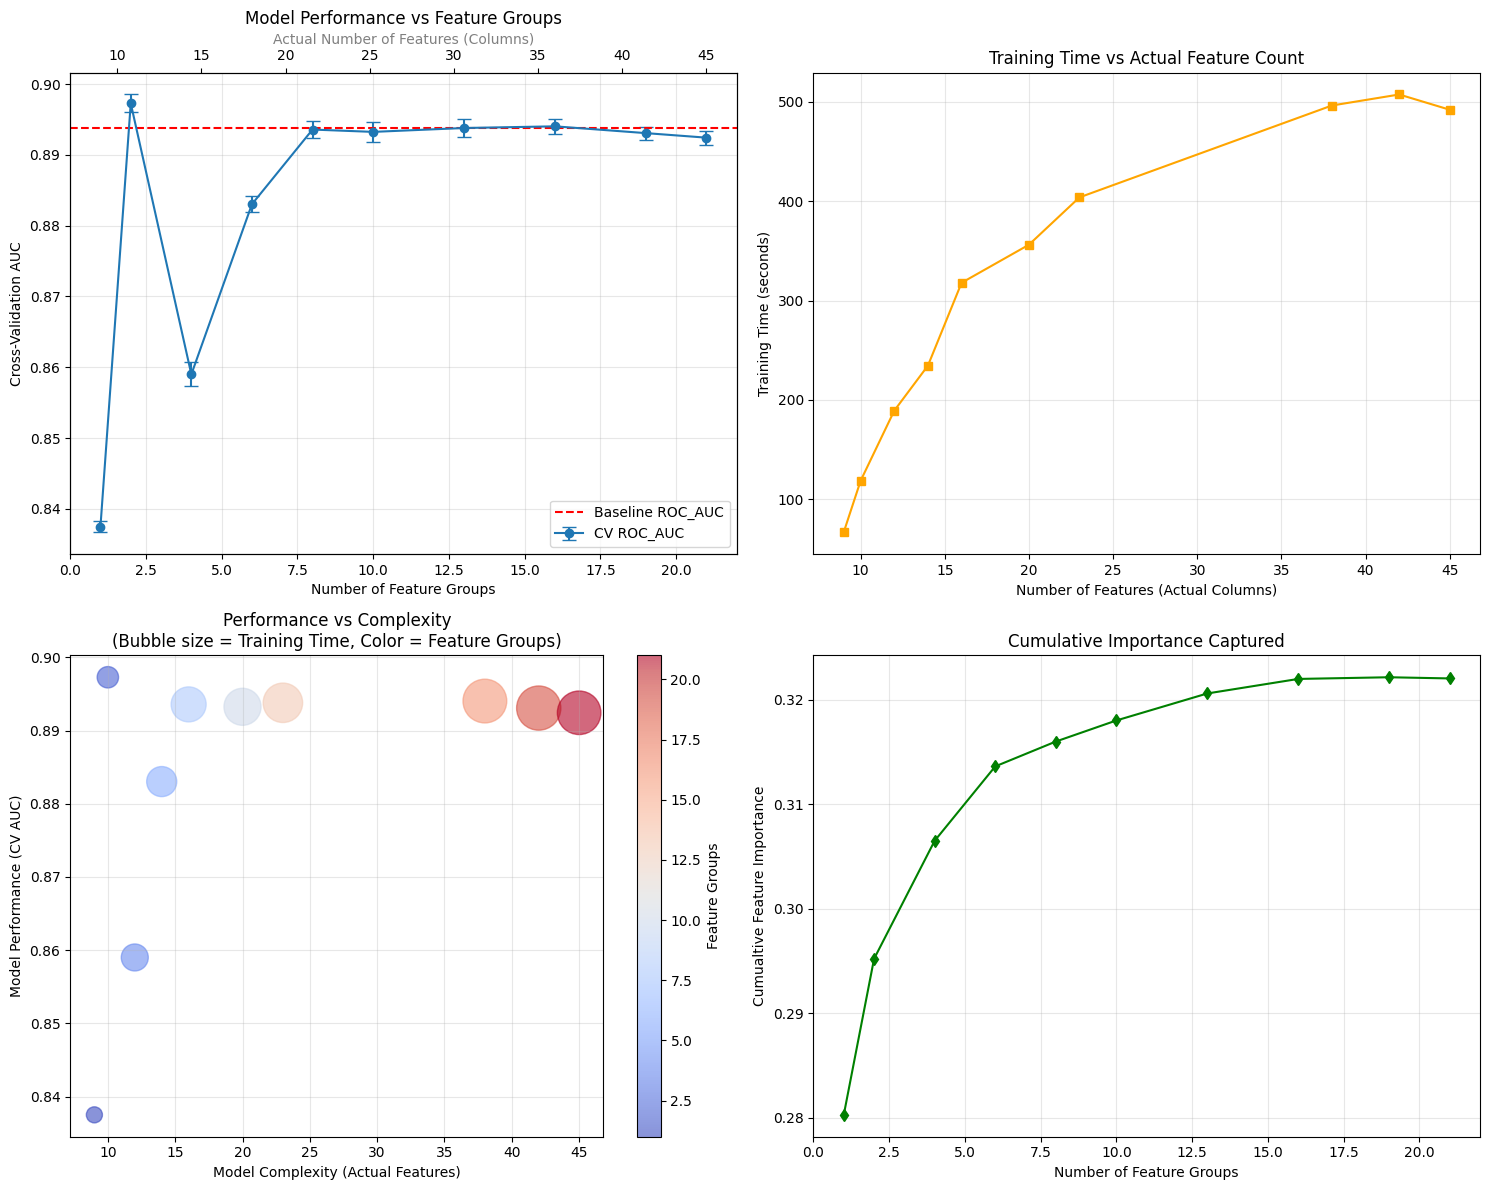

In [108]:
plot_performance_analysis(results)

In [121]:
def analyze_performance_drops(results_df):
    """Analyze where significant performance drops occur"""
    
    results_df = results_df.copy()
    results_df['auc_drop'] = results_df['cv_auc_mean'].diff()
    results_df['auc_drop_pct'] = (results_df['auc_drop'] / results_df['cv_auc_mean'].shift(1)) * 100
    
    print("\n" + "="*60)
    print("PERFORMANCE DROP ANALYSIS")
    print("="*60)
    
    print("\nPerformance changes between feature group counts:")
    
    analysis_pairs = list(zip(range(len(results_df)-1), range(1, len(results_df))))
    
    pbar_analysis = tqdm(analysis_pairs, desc="Initializing analysis...", 
                        bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}] | {rate_fmt}')
    
    for pair_idx, (i, j) in enumerate(pbar_analysis):
        pbar_analysis.set_description(f"Analyzing drop {pair_idx + 1}/{len(analysis_pairs)}")
        
        prev_row = results_df.iloc[i]
        curr_row = results_df.iloc[j]
        
        prev_auc = prev_row['cv_auc_mean']
        curr_auc = curr_row['cv_auc_mean']

        drop = curr_auc - prev_auc
        drop_pct = (drop / prev_auc) * 100
        
        if drop_pct < -1.0:
            status = "SIGNIFICANT DROP"
        elif drop_pct < -0.5:
            status = "MODERATE DROP"
        elif drop_pct < 0:
            status = "SMALL DROP"
        else:
            status = "IMPROVEMENT"
            
        print(f"{prev_row['n_features_group']:2d} -> {curr_row['n_features_group']:2d} groups "
                f"({prev_row['n_features']:2d} -> {curr_row['n_features']:2d} features): "
                f"{drop:+.4f} AUC ({drop_pct:+.2f}%) {status}")
    
    pbar_analysis.close()
    
    
    return results_df

In [122]:
perf_drop_analysis = analyze_performance_drops(results)


PERFORMANCE DROP ANALYSIS

Performance changes between feature group counts:


Analyzing drop 9/9: 100%|██████████| 9/9 [00:00<00:00] | 627.11it/s

 1 ->  2 groups ( 9 -> 10 features): +0.0598 AUC (+7.14%) IMPROVEMENT
 2 ->  4 groups (10 -> 12 features): -0.0383 AUC (-4.27%) SIGNIFICANT DROP
 4 ->  6 groups (12 -> 14 features): +0.0240 AUC (+2.80%) IMPROVEMENT
 6 ->  8 groups (14 -> 16 features): +0.0105 AUC (+1.19%) IMPROVEMENT
 8 -> 10 groups (16 -> 20 features): -0.0003 AUC (-0.04%) SMALL DROP
10 -> 13 groups (20 -> 23 features): +0.0005 AUC (+0.06%) IMPROVEMENT
13 -> 16 groups (23 -> 38 features): +0.0002 AUC (+0.03%) IMPROVEMENT
16 -> 19 groups (38 -> 42 features): -0.0010 AUC (-0.11%) SMALL DROP
19 -> 21 groups (42 -> 45 features): -0.0006 AUC (-0.07%) SMALL DROP


In [127]:
print(results.loc[results['n_features_group'] == 16, 'avg_confusion_matrix'].values)

['[[ 6108.8  7496.2]\n [  231.  55542.2]]']


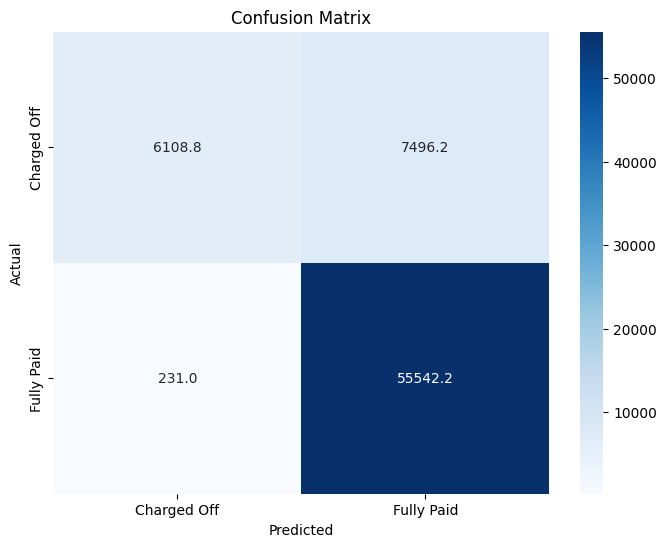

In [ ]:
import re

cm_string = results.loc[results['n_features_group'] == 16, 'avg_confusion_matrix'].values[0]

numbers = re.findall(r'[\d.]+', cm_string)
cm = np.array([float(x) for x in numbers]).reshape(2, 2)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', 
            xticklabels=['Charged Off', 'Fully Paid'],
            yticklabels=['Charged Off', 'Fully Paid'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [172]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import time

def get_feature_columns_for_groups(feature_importance_data, one_hot_groups): 
    all_columns = []
    for feature in feature_importance_data:
        if feature in one_hot_groups:
            all_columns.extend(one_hot_groups[feature])
        else:
            all_columns.append(feature)
    return all_columns

def evaluate_smote_model(x, y, features_ordered, one_hot_groups, n_features_group=16, cv_folds=5, smote_ratio=0.3):
    print(f"=== SMOTE MODEL EVALUATION ===")
    print(f"Using {n_features_group} feature groups with {cv_folds}-fold cross-validation")
    print(f"SMOTE sampling ratio: {smote_ratio} ({'1:1 balanced' if smote_ratio == 1.0 else f'{smote_ratio:.0%} minority class'})")
    
    selected_features = features_ordered[:n_features_group]
    selected_columns = get_feature_columns_for_groups(selected_features, one_hot_groups)
    available_columns = [col for col in selected_columns if col in x.columns]
    x_subset = x[available_columns]
    
    print(f"Using {len(available_columns)} actual features from {n_features_group} feature groups")
    print(f"Selected groups: {', '.join(selected_features)}")
    
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    smote_cv_scores = {
        'roc_auc': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'confusion_matrix': []
    }
    
    
    original_samples = len(y)
    original_class_dist = Counter(y)
    print(f"Original class distribution: {dict(original_class_dist)}")
    
    train_scores = {'roc_auc': [], 'accuracy': [], 'f1': []}
    smote_stats = {'original': [], 'after_smote': [], 'synthetic_added': []}
    
    start_time = time.time()
    
    final_model = None 
    
    for fold_idx, (train_idx, val_idx) in enumerate(cv.split(x_subset, y)):
        print(f"\nFold {fold_idx + 1}/{cv_folds}...")
        
        x_train, x_val = x_subset.iloc[train_idx], x_subset.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        original_train_count = Counter(y_train)
        print(f"  Before SMOTE: {dict(original_train_count)}")
        
        smote = SMOTE(sampling_strategy=smote_ratio, random_state=42)
        x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
        
        balanced_count = Counter(y_train_balanced)
        synthetic_added = len(y_train_balanced) - len(y_train)
        
        print(f"  After SMOTE: {dict(balanced_count)}")
        print(f"  Synthetic samples added: {synthetic_added}")
        
        smote_stats['original'].append(len(y_train))
        smote_stats['after_smote'].append(len(y_train_balanced))
        smote_stats['synthetic_added'].append(synthetic_added)
        
        model = RandomForestClassifier(
            n_estimators=200, 
            random_state=42,
            n_jobs=-1
        )
        
        model.fit(x_train_balanced, y_train_balanced)
        final_model = model  
        
        y_pred_proba = model.predict_proba(x_val)[:, 1]
        y_pred = model.predict(x_val)
        
        fold_roc_auc = roc_auc_score(y_val, y_pred_proba)
        fold_accuracy = accuracy_score(y_val, y_pred)
        fold_precision = precision_score(y_val, y_pred, zero_division=0)
        fold_recall = recall_score(y_val, y_pred, zero_division=0)
        fold_f1 = f1_score(y_val, y_pred, zero_division=0)
        fold_cm = confusion_matrix(y_val, y_pred)
        
        smote_cv_scores['roc_auc'].append(fold_roc_auc)
        smote_cv_scores['accuracy'].append(fold_accuracy)
        smote_cv_scores['precision'].append(fold_precision)
        smote_cv_scores['recall'].append(fold_recall)
        smote_cv_scores['f1'].append(fold_f1)
        smote_cv_scores['confusion_matrix'].append(fold_cm)
        
        y_train_pred_proba = model.predict_proba(x_train_balanced)[:, 1]
        y_train_pred = model.predict(x_train_balanced)
        
        train_roc_auc = roc_auc_score(y_train_balanced, y_train_pred_proba)
        train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
        train_f1 = f1_score(y_train_balanced, y_train_pred, zero_division=0)
        
        train_scores['roc_auc'].append(train_roc_auc)
        train_scores['accuracy'].append(train_accuracy)
        train_scores['f1'].append(train_f1)
        
        print(f"  Fold {fold_idx + 1} - Val AUC: {fold_roc_auc:.4f}, Val F1: {fold_f1:.4f}")
        print(f"                    Train AUC: {train_roc_auc:.4f}, Train F1: {train_f1:.4f}")
    
    for metric in ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']:
        smote_cv_scores[metric] = np.array(smote_cv_scores[metric])
    
    for metric in ['roc_auc', 'accuracy', 'f1']:
        train_scores[metric] = np.array(train_scores[metric])
    
    end_time = time.time()
    training_time = end_time - start_time
    
    avg_confusion_matrix = np.mean(smote_cv_scores['confusion_matrix'], axis=0)
    
    avg_original = np.mean(smote_stats['original'])
    avg_after_smote = np.mean(smote_stats['after_smote'])
    avg_synthetic_added = np.mean(smote_stats['synthetic_added'])
    
    results = {
        'n_features': len(available_columns),
        'groups_used': ', '.join(selected_features),
        'method': 'SMOTE + RF',
        
        'cv_auc_mean': smote_cv_scores['roc_auc'].mean(),
        'cv_auc_std': smote_cv_scores['roc_auc'].std(),
        'cv_accuracy_mean': smote_cv_scores['accuracy'].mean(),
        'cv_accuracy_std': smote_cv_scores['accuracy'].std(),
        'cv_precision_mean': smote_cv_scores['precision'].mean(),
        'cv_precision_std': smote_cv_scores['precision'].std(),
        'cv_recall_mean': smote_cv_scores['recall'].mean(),
        'cv_recall_std': smote_cv_scores['recall'].std(),
        'cv_f1_mean': smote_cv_scores['f1'].mean(),
        'cv_f1_std': smote_cv_scores['f1'].std(),
        

        'train_roc_auc': train_scores['roc_auc'].mean(),
        'train_accuracy': train_scores['accuracy'].mean(),
        'train_f1': train_scores['f1'].mean(),
        
        'avg_confusion_matrix': avg_confusion_matrix,
        
        'original_samples': int(avg_original),
        'balanced_samples': int(avg_after_smote),
        'synthetic_samples_added': int(avg_synthetic_added),
        
        'training_time': training_time,
    }
    
    return results, final_model



In [173]:
importance = pd.read_csv('Feature_Importance.csv', index_col=0)
features_ordered = importance['Feature'].tolist()

In [174]:
one_hot_groups = {
    'application_type': ['application_type_INDIVIDUAL', 'application_type_JOINT'],
    'home_ownership': ['home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
    'initial_list_status': ['initial_list_status_w'],
    'purpose': ['purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational',
                'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical',
                'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
                'purpose_vacation', 'purpose_wedding'],
    'verification_status': ['verification_status_Source Verified', 'verification_status_Verified'],
    'zip_code': ['zip_code_05113', 'zip_code_11650', 'zip_code_22690', 'zip_code_29597', 'zip_code_30723', 'zip_code_48052', 'zip_code_70466', 'zip_code_86630', 'zip_code_93700']
}

individual = ['loan_amnt', 'term', 'int_rate', 'installment', 'dti', 'open_acc', 'pub_rec', 'revol_util',
                'total_acc', 'mort_acc', 'pub_rec_bankruptcies','annual_inc_log', 
                'revol_bal_log', 'sub_grade_enc', 'cred_hist_yrs']



print("Testing different SMOTE ratios for optimal performance...")
print("="*80)

ratios_to_test = {
    0.3: "small (low)", 
    0.4: "moderate (mid)",
    0.5: "Balanced (high)",
    0.6: 'Aggressive',
    0.7: 'Very Aggresive'
}

all_results = []
best_models = {}

for ratio, description in ratios_to_test.items():
    print(f"\nTesting SMOTE ratio: {description}")
    print("-" * 50)
    
    results, model = evaluate_smote_model(
        x, y, features_ordered, one_hot_groups, 
        n_features_group=16, cv_folds=5, smote_ratio=ratio
    )
    
    result_row = {
        'smote_ratio': ratio,
        'ratio_description': description,
        'cv_auc_mean': results['cv_auc_mean'],
        'cv_auc_std': results['cv_auc_std'],
        'cv_accuracy_mean': results['cv_accuracy_mean'],
        'cv_accuracy_std': results['cv_accuracy_std'],
        'cv_precision_mean': results['cv_precision_mean'],
        'cv_precision_std': results['cv_precision_std'],
        'cv_recall_mean': results['cv_recall_mean'],
        'cv_recall_std': results['cv_recall_std'],
        'cv_f1_mean': results['cv_f1_mean'],
        'cv_f1_std': results['cv_f1_std'],
        'train_roc_auc': results['train_roc_auc'],
        'train_accuracy': results['train_accuracy'],
        'train_f1': results['train_f1'],
        'avg_confusion_matrix': results['avg_confusion_matrix'],
        'avg_tn': results['avg_confusion_matrix'][0,0],
        'avg_fp': results['avg_confusion_matrix'][0,1],
        'avg_fn': results['avg_confusion_matrix'][1,0],
        'avg_tp': results['avg_confusion_matrix'][1,1],
        'original_samples': results['original_samples'],
        'balanced_samples': results['balanced_samples'],
        'synthetic_samples_added': results['synthetic_samples_added'],
        'training_time': results['training_time']
    }
    
    all_results.append(result_row)
    best_models[ratio] = model
    

    print(f"   Quick Summary - {description}:")
    print(f"   Precision: {results['cv_precision_mean']:.4f} ± {results['cv_precision_std']:.4f}")
    print(f"   Recall:    {results['cv_recall_mean']:.4f} ± {results['cv_recall_std']:.4f}")
    print(f"   F1-Score:  {results['cv_f1_mean']:.4f} ± {results['cv_f1_std']:.4f}")
    print(f"   AUC:       {results['cv_auc_mean']:.4f} ± {results['cv_auc_std']:.4f}")

smote_comparison_df = pd.DataFrame(all_results)




Testing different SMOTE ratios for optimal performance...

Testing SMOTE ratio: small (low)
--------------------------------------------------
=== SMOTE MODEL EVALUATION ===
Using 16 feature groups with 5-fold cross-validation
SMOTE sampling ratio: 0.3 (30% minority class)
Using 38 actual features from 16 feature groups
Selected groups: zip_code, sub_grade_enc, int_rate, annual_inc_log, term, dti, revol_bal_log, revol_util, mort_acc, home_ownership, loan_amnt, cred_hist_yrs, installment, purpose, total_acc, open_acc
Original class distribution: {1: 278866, 0: 68025}

Fold 1/5...
  Before SMOTE: {1: 223092, 0: 54420}
  After SMOTE: {1: 223092, 0: 66927}
  Synthetic samples added: 12507
  Fold 1 - Val AUC: 0.8792, Val F1: 0.9335
                    Train AUC: 1.0000, Train F1: 1.0000

Fold 2/5...
  Before SMOTE: {1: 223093, 0: 54420}
  After SMOTE: {1: 223093, 0: 66927}
  Synthetic samples added: 12507
  Fold 2 - Val AUC: 0.8785, Val F1: 0.9331
                    Train AUC: 1.0000, Trai

In [175]:
smote_comparison_df.head()

,smote_ratio,ratio_description,cv_auc_mean,cv_auc_std,cv_accuracy_mean,cv_accuracy_std,cv_precision_mean,cv_precision_std,cv_recall_mean,cv_recall_std,cv_f1_mean,cv_f1_std,train_roc_auc,train_accuracy,train_f1,avg_confusion_matrix,avg_tn,avg_fp,avg_fn,avg_tp,original_samples,balanced_samples,synthetic_samples_added,training_time
0,0.3,small (low),0.880214,0.001352,0.886561,0.000526,0.883412,0.000466,0.989475,0.000294,0.933440,0.000297,1.0,1.0,1.0,"[[6321.8, 7283.2], [587.0, 55186.2]]",6321.8,7283.2,587.0,55186.2,277512,290019,12507,571.990152
1,0.4,moderate (mid),0.873628,0.001412,0.881712,0.000950,0.884362,0.000521,0.981152,0.000867,0.930246,0.000571,1.0,1.0,1.0,"[[6449.6, 7155.4], [1051.2, 54722.0]]",6449.6,7155.4,1051.2,54722.0,277512,312329,34816,676.768646
2,0.5,Balanced (high),0.868472,0.001317,0.876564,0.000755,0.884508,0.000705,0.973575,0.000648,0.926907,0.000434,1.0,1.0,1.0,"[[6515.0, 7090.0], [1473.8, 54299.4]]",6515.0,7090.0,1473.8,54299.4,277512,334638,57126,716.789803
3,0.6,Aggressive,0.864067,0.001226,0.871311,0.000635,0.884517,0.000619,0.966048,0.000375,0.923486,0.000357,1.0,1.0,1.0,"[[6570.4, 7034.6], [1893.6, 53879.6]]",6570.4,7034.6,1893.6,53879.6,277512,356947,79435,803.323983
4,0.7,Very Aggresive,0.860697,0.001252,0.866667,0.000909,0.884441,0.000673,0.959511,0.000619,0.920448,0.000535,1.0,1.0,1.0,"[[6612.8, 6992.2], [2258.2, 53515.0]]",6612.8,6992.2,2258.2,53515.0,277512,379257,101744,867.784283


In [176]:
smote_comparison_df.to_csv("smote_comparison_df.csv")

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
)
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import time
import numpy as np

def get_feature_columns_for_groups(feature_importance_data, one_hot_groups): 
    all_columns = []
    for feature in feature_importance_data:
        if feature in one_hot_groups:
            all_columns.extend(one_hot_groups[feature])
        else:
            all_columns.append(feature)
    return all_columns

def evaluate_undersample_model(
    x, 
    y, 
    features_ordered, 
    one_hot_groups, 
    n_features_group=16, 
    cv_folds=5, 
    undersample_ratio=0.3
):
    
    print("=== UNDERSAMPLING MODEL EVALUATION ===")
    print(f"Using {n_features_group} feature groups with {cv_folds}-fold cross-validation")
    print(f"Undersampling ratio: {undersample_ratio:.2f}  "
            f"({'1:1 balanced' if undersample_ratio == 1.0 else f'{undersample_ratio:.0%} minority-to-majority'})")
    
    selected_features = features_ordered[:n_features_group]
    selected_columns = get_feature_columns_for_groups(selected_features, one_hot_groups)
    available_columns = [col for col in selected_columns if col in x.columns]
    x_subset = x[available_columns]
    
    print(f"Using {len(available_columns)} actual features from {n_features_group} feature groups")
    print(f"Selected groups: {', '.join(selected_features)}")
    
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    us_cv_scores = {
        'roc_auc': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'confusion_matrix': []
    }
    
    original_samples = len(y)
    original_class_dist = Counter(y)
    print(f"Original class distribution: {dict(original_class_dist)}")
    
    train_scores = {'roc_auc': [], 'accuracy': [], 'f1': []}
    us_stats = {'original': [], 'after_us': [], 'removed': []}
    
    start_time = time.time()
    final_model = None 
    
    for fold_idx, (train_idx, val_idx) in enumerate(cv.split(x_subset, y)):
        print(f"\nFold {fold_idx + 1}/{cv_folds}...")
        
        x_train, x_val = x_subset.iloc[train_idx], x_subset.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        original_train_count = Counter(y_train)
        print(f"  Before Undersampling: {dict(original_train_count)}")
        
        rus = RandomUnderSampler(sampling_strategy=undersample_ratio, random_state=42)
        x_train_balanced, y_train_balanced = rus.fit_resample(x_train, y_train)
        
        balanced_count = Counter(y_train_balanced)
        removed_count = len(y_train) - len(y_train_balanced)
        
        print(f"  After Undersampling: {dict(balanced_count)}")
        print(f"  Samples removed from majority: {removed_count}")
        
        us_stats['original'].append(len(y_train))
        us_stats['after_us'].append(len(y_train_balanced))
        us_stats['removed'].append(removed_count)
        
        model = RandomForestClassifier(
            n_estimators=200, 
            random_state=42,
            n_jobs=-1
        )
        model.fit(x_train_balanced, y_train_balanced)
        final_model = model
        

        y_pred_proba = model.predict_proba(x_val)[:, 1]
        y_pred = model.predict(x_val)
        
        fold_roc_auc = roc_auc_score(y_val, y_pred_proba)
        fold_accuracy = accuracy_score(y_val, y_pred)
        fold_precision = precision_score(y_val, y_pred, zero_division=0)
        fold_recall = recall_score(y_val, y_pred, zero_division=0)
        fold_f1 = f1_score(y_val, y_pred, zero_division=0)
        fold_cm = confusion_matrix(y_val, y_pred)
        
        us_cv_scores['roc_auc'].append(fold_roc_auc)
        us_cv_scores['accuracy'].append(fold_accuracy)
        us_cv_scores['precision'].append(fold_precision)
        us_cv_scores['recall'].append(fold_recall)
        us_cv_scores['f1'].append(fold_f1)
        us_cv_scores['confusion_matrix'].append(fold_cm)
        
        y_train_pred_proba = model.predict_proba(x_train_balanced)[:, 1]
        y_train_pred = model.predict(x_train_balanced)
        
        train_roc_auc = roc_auc_score(y_train_balanced, y_train_pred_proba)
        train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
        train_f1 = f1_score(y_train_balanced, y_train_pred, zero_division=0)
        
        train_scores['roc_auc'].append(train_roc_auc)
        train_scores['accuracy'].append(train_accuracy)
        train_scores['f1'].append(train_f1)
        
        print(f"  Fold {fold_idx + 1} - Val AUC: {fold_roc_auc:.4f}, Val F1: {fold_f1:.4f}")
        print(f"                    Train AUC: {train_roc_auc:.4f}, Train F1: {train_f1:.4f}")
    

    for metric in ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']:
        us_cv_scores[metric] = np.array(us_cv_scores[metric])
    for metric in ['roc_auc', 'accuracy', 'f1']:
        train_scores[metric] = np.array(train_scores[metric])
    
    end_time = time.time()
    training_time = end_time - start_time
    
    avg_confusion_matrix = np.mean(us_cv_scores['confusion_matrix'], axis=0)
    avg_original = np.mean(us_stats['original'])
    avg_after_us = np.mean(us_stats['after_us'])
    avg_removed = np.mean(us_stats['removed'])
    
    results = {
        'n_features': len(available_columns),
        'groups_used': ', '.join(selected_features),
        'method': 'RandomUnderSampler + RF',
        
        'cv_auc_mean': us_cv_scores['roc_auc'].mean(),
        'cv_auc_std': us_cv_scores['roc_auc'].std(),
        'cv_accuracy_mean': us_cv_scores['accuracy'].mean(),
        'cv_accuracy_std': us_cv_scores['accuracy'].std(),
        'cv_precision_mean': us_cv_scores['precision'].mean(),
        'cv_precision_std': us_cv_scores['precision'].std(),
        'cv_recall_mean': us_cv_scores['recall'].mean(),
        'cv_recall_std': us_cv_scores['recall'].std(),
        'cv_f1_mean': us_cv_scores['f1'].mean(),
        'cv_f1_std': us_cv_scores['f1'].std(),
        
        'train_roc_auc': train_scores['roc_auc'].mean(),
        'train_accuracy': train_scores['accuracy'].mean(),
        'train_f1': train_scores['f1'].mean(),
        
        'avg_confusion_matrix': avg_confusion_matrix,
        
        'original_samples': int(avg_original),
        'balanced_samples': int(avg_after_us),
        'samples_removed': int(avg_removed),
        
        'training_time': training_time,
    }
    
    return results, final_model


In [163]:
one_hot_groups = {
    'application_type': ['application_type_INDIVIDUAL', 'application_type_JOINT'],
    'home_ownership': ['home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
    'initial_list_status': ['initial_list_status_w'],
    'purpose': ['purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational',
                'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical',
                'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
                'purpose_vacation', 'purpose_wedding'],
    'verification_status': ['verification_status_Source Verified', 'verification_status_Verified'],
    'zip_code': ['zip_code_05113', 'zip_code_11650', 'zip_code_22690', 'zip_code_29597', 'zip_code_30723', 'zip_code_48052', 'zip_code_70466', 'zip_code_86630', 'zip_code_93700']
}

individual = ['loan_amnt', 'term', 'int_rate', 'installment', 'dti', 'open_acc', 'pub_rec', 'revol_util',
                'total_acc', 'mort_acc', 'pub_rec_bankruptcies','annual_inc_log', 
                'revol_bal_log', 'sub_grade_enc', 'cred_hist_yrs']

print("Testing different Random Undersampling ratios for optimal performance...")
print("="*80)

ratios_to_test = {
    0.3: "small (low)", 
    0.4: "moderate (mid)",
    0.5: "Balanced (high)",
    0.6: 'Aggressive',
    0.7: 'Very Aggresive'
}

all_results = []
best_models = {}

for ratio, description in ratios_to_test.items():
    print(f"\nTesting Random Undersampling ratio: {description}")
    print("-" * 50)
    
    results, model = evaluate_undersample_model(
        x, y, features_ordered, one_hot_groups, 
        n_features_group=16, cv_folds=5, undersample_ratio=ratio
    )
    
    result_row = {
        'undersampling_ratio': ratio,
        'ratio_description': description,
        'cv_auc_mean': results['cv_auc_mean'],
        'cv_auc_std': results['cv_auc_std'],
        'cv_accuracy_mean': results['cv_accuracy_mean'],
        'cv_accuracy_std': results['cv_accuracy_std'],
        'cv_precision_mean': results['cv_precision_mean'],
        'cv_precision_std': results['cv_precision_std'],
        'cv_recall_mean': results['cv_recall_mean'],
        'cv_recall_std': results['cv_recall_std'],
        'cv_f1_mean': results['cv_f1_mean'],
        'cv_f1_std': results['cv_f1_std'],
        'train_roc_auc': results['train_roc_auc'],
        'train_accuracy': results['train_accuracy'],
        'train_f1': results['train_f1'],
        'avg_confusion_matrix': results['avg_confusion_matrix'],
        'avg_tn': results['avg_confusion_matrix'][0,0],
        'avg_fp': results['avg_confusion_matrix'][0,1],
        'avg_fn': results['avg_confusion_matrix'][1,0],
        'avg_tp': results['avg_confusion_matrix'][1,1],
        'original_samples': results['original_samples'],
        'balanced_samples': results['balanced_samples'],
        'samples_removed': results['samples_removed'],
        'training_time': results['training_time']
    }
    
    all_results.append(result_row)
    best_models[ratio] = model
    
    print(f"   Quick Summary - {description}:")
    print(f"   Precision: {results['cv_precision_mean']:.4f} ± {results['cv_precision_std']:.4f}")
    print(f"   Recall:    {results['cv_recall_mean']:.4f} ± {results['cv_recall_std']:.4f}")
    print(f"   F1-Score:  {results['cv_f1_mean']:.4f} ± {results['cv_f1_std']:.4f}")
    print(f"   AUC:       {results['cv_auc_mean']:.4f} ± {results['cv_auc_std']:.4f}")

undersampling_comparison_df = pd.DataFrame(all_results)

Testing different Random Undersampling ratios for optimal performance...

Testing Random Undersampling ratio: small (low)
--------------------------------------------------
=== UNDERSAMPLING MODEL EVALUATION ===
Using 16 feature groups with 5-fold cross-validation
Undersampling ratio: 0.30  (30% minority-to-majority)
Using 38 actual features from 16 feature groups
Selected groups: zip_code, sub_grade_enc, int_rate, annual_inc_log, term, dti, revol_bal_log, revol_util, mort_acc, home_ownership, loan_amnt, cred_hist_yrs, installment, purpose, total_acc, open_acc
Original class distribution: {1: 278866, 0: 68025}

Fold 1/5...
  Before Undersampling: {1: 223092, 0: 54420}
  After Undersampling: {0: 54420, 1: 181400}
  Samples removed from majority: 41692
  Fold 1 - Val AUC: 0.8950, Val F1: 0.9343
                    Train AUC: 1.0000, Train F1: 1.0000

Fold 2/5...
  Before Undersampling: {1: 223093, 0: 54420}
  After Undersampling: {0: 54420, 1: 181400}
  Samples removed from majority: 416

In [165]:
undersampling_comparison_df.head()

,undersampling_ratio,ratio_description,cv_auc_mean,cv_auc_std,cv_accuracy_mean,cv_accuracy_std,cv_precision_mean,cv_precision_std,cv_recall_mean,cv_recall_std,cv_f1_mean,cv_f1_std,train_roc_auc,train_accuracy,train_f1,avg_confusion_matrix,avg_tn,avg_fp,avg_fn,avg_tp,original_samples,balanced_samples,samples_removed,training_time
0,0.3,small (low),0.895319,0.001011,0.888149,0.000506,0.885956,0.000514,0.988052,0.000586,0.934223,0.000293,1.0,1.0,1.0,"[[6511.4, 7093.6], [666.4, 55106.8]]",6511.4,7093.6,666.4,55106.8,277512,235820,41692,382.164872
1,0.4,moderate (mid),0.895642,0.000940,0.884595,0.000740,0.894277,0.000600,0.971269,0.001099,0.931184,0.000464,1.0,1.0,1.0,"[[7200.8, 6404.2], [1602.4, 54170.8]]",7200.8,6404.2,1602.4,54170.8,277512,190470,87042,315.179175
2,0.5,Balanced (high),0.896617,0.000851,0.877212,0.001703,0.903228,0.000897,0.948929,0.001849,0.925514,0.001075,1.0,1.0,1.0,"[[7934.6, 5670.4], [2848.4, 52924.8]]",7934.6,5670.4,2848.4,52924.8,277512,163260,114252,300.458499
3,0.6,Aggressive,0.896498,0.001030,0.866670,0.000959,0.911372,0.000616,0.924003,0.001290,0.917643,0.000634,1.0,1.0,1.0,"[[8593.4, 5011.6], [4238.6, 51534.6]]",8593.4,5011.6,4238.6,51534.6,277512,145120,132392,296.690473
4,0.7,Very Aggresive,0.896207,0.001107,0.853963,0.001464,0.919125,0.001009,0.897295,0.001588,0.908078,0.000959,1.0,1.0,1.0,"[[9201.4, 4403.6], [5728.2, 50045.0]]",9201.4,4403.6,5728.2,50045.0,277512,132162,145350,221.145756


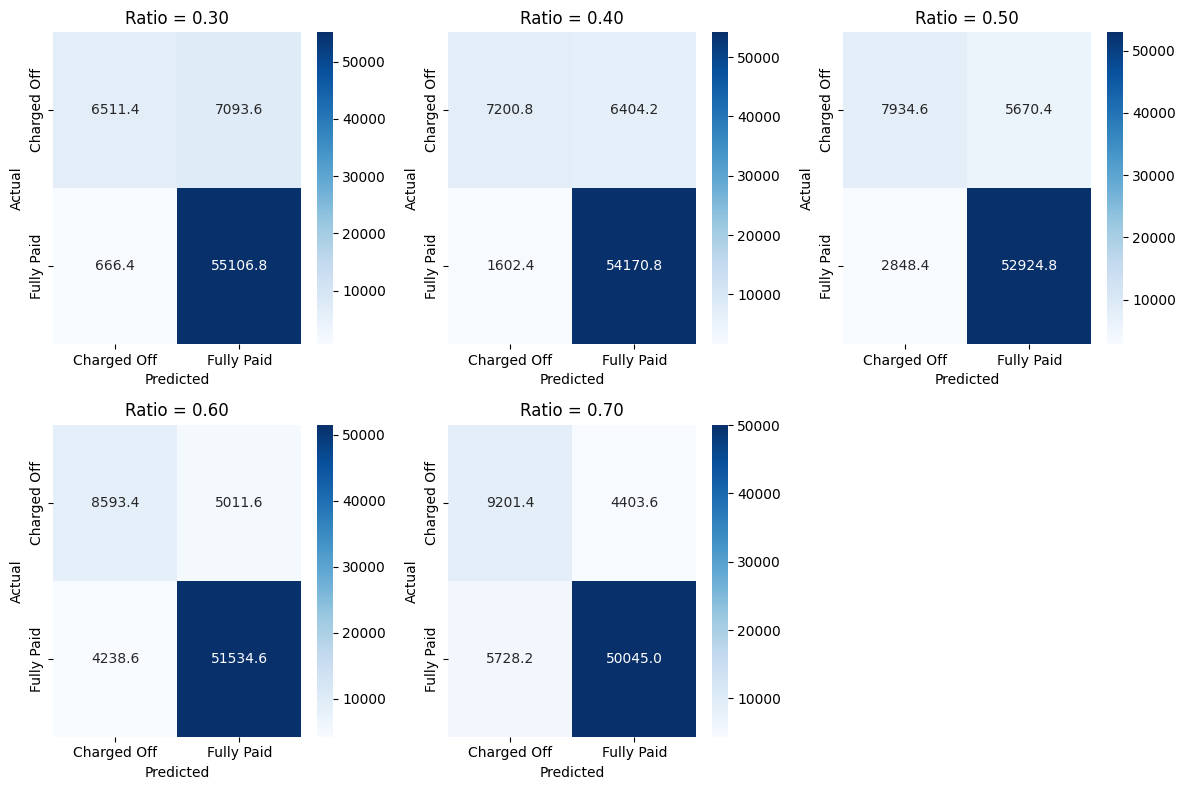

In [171]:
df = undersampling_comparison_df
num = len(df)
n_cols = 3
n_rows = (num + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for ax, (_, row) in zip(axes, df.iterrows()):
    ratio = row['undersampling_ratio']
    cm_data = row['avg_confusion_matrix']
    
    cm_string = (
        cm_data.decode('utf-8')
        if isinstance(cm_data, (bytes, bytearray))
        else str(cm_data)
    )
    numbers = re.findall(r'[\d.]+', cm_string)
    cm = np.array([float(x) for x in numbers]).reshape(2, 2)
    
    sns.heatmap(
        cm,
        annot=True,
        fmt='.1f',
        cmap='Blues',
        xticklabels=['Charged Off', 'Fully Paid'],
        yticklabels=['Charged Off', 'Fully Paid'],
        ax=ax
    )
    ax.set_title(f'Ratio = {ratio:.2f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Turn off any unused subplots
for ax in axes[num:]:
    ax.axis('off')

plt.tight_layout()
plt.show()
